<a href="https://colab.research.google.com/github/Azay961/Data-Science-with-GenAI-Internship---Sep-2024_Innomatics/blob/main/AMCAT_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Learning Resources](https://github.com/bansalkanav/Ultimate-Data-Science-Toolkit---From-Python-Basics-to-GenerativeAI/blob/master/Module%203%20-%20Advance%20Data%20Analysis%20and%20Statistics/1.%20Data%20Distributions/distribution_introduction.ipynb)

[About Data](https://docs.google.com/document/d/1BOMKq98iajVrU1Ksgh04q-ZeTKZK2f_DuLDY5DryJb8/edit)

# Analysis of AMEO Data

## Dataset Description
The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.

## Objective
The goal of this Exploratory Data Analysis (EDA) is to extensively investigate the provided dataset, with a particular emphasis on understanding the link between various variables and the target variable, Salary.

The key aims of this analysis include:


*   Providing a detailed explanation of the dataset's features.
*   Find any observable patterns or trends in the data
*   Investigating the relationships between the independent factors and the     target variable (salary).
*   Identify any outliers or abnormalities in the dataset.
*   Offering practical insights and recommendations based on the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_excel('/content/amcat_data.xlsx')
df.sample(5)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
25,train,350211,435000,2012-09-01,present,systems analyst,Gurgaon,f,1991-03-02,86.8,cbse,2008,82.8,cbse,9019,2,B.Tech/B.E.,computer science & engineering,78.00,9019,0,Haryana,2012,575,585,575,0.744758,565,-1,438,-1,-1,-1,-1,0.0464,1.2028,-0.9245,0.5323,-0.2875
2055,train,196447,370000,2012-06-01,present,software developer,Noida,f,1988-09-09,79.0,cbse,2006,69.4,cbse,115,2,MCA,computer application,65.00,115,0,Punjab,2011,495,555,545,0.735796,475,-1,-1,-1,-1,-1,-1,0.0464,-0.4353,0.6720,0.0623,0.0284
3407,train,242701,600000,2011-06-01,present,senior software engineer,Bangalore,m,1988-04-10,73.8,0,2006,55.8,0,1436,2,B.Tech/B.E.,electronics and electrical engineering,54.00,1436,0,Karnataka,2011,395,405,445,0.376060,-1,300,-1,-1,-1,286,-1,-3.5085,-1.9953,-0.7794,0.2973,-1.3934
1769,train,1268067,325000,2015-12-01,present,business analyst,Bangalore,m,1994-08-17,89.6,state board,2011,95.8,state board,9748,2,B.Tech/B.E.,computer science & engineering,72.45,9748,1,Telangana,2015,545,545,690,0.144790,455,-1,284,-1,-1,-1,-1,-0.0154,-1.9521,-1.5270,0.1459,-2.9686
1573,train,466789,420000,2013-11-01,present,java developer,Bangalore,m,1989-04-20,71.0,bihar,2008,59.4,bihar,3741,2,B.Tech/B.E.,computer science & engineering,67.00,3741,0,Uttarakhand,2012,515,565,655,0.953900,565,-1,530,-1,-1,-1,-1,0.5100,-0.0842,-0.8157,-0.0552,0.0284


In [3]:
print("Shape of the data", df.shape)
print("Description of the data\n", df.describe())

Shape of the data (3998, 39)
Description of the data
                  ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min    1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max    1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

                                 DOB  10percentage  12graduation  \
count                           3998   3998.000000   3998.000000   
mean   1990-12-06 06:01:15.637819008     77.925443   2008.087544   
min              1977-10-30 00:00:00     43.000000   1995.000000   
25%              1989-11-16 06:00:00     71.680000   2007.000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

# Data Preprocessing

In [5]:
df = df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


As survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as present for DOL actually left the company within 2015 only. So, we will replace present value in DOL with 2015-12-12.

In [6]:
# fixing the type of columns

df.columns = df.columns.str.strip()
df["DOJ"] = pd.to_datetime(df["DOJ"])
df["DOB"] = pd.to_datetime(df["DOB"])
df["DOL"] = df["DOL"].apply(lambda x : pd.to_datetime('2015-12-31') if x == "present" else pd.to_datetime(x))

### Checking if the `DOL (Date of leaving)` is greater than `DOJ (Date of joining)` or not

In [7]:
df[df["DOL"]<df["DOJ"]].shape[0]

40

It Shows that total data points with DOJ > DOL are 40.
So dropping those rows

In [8]:
df = df.drop(df[df["DOL"]<df["DOJ"]].index, axis=0)
print(df.shape)

(3958, 35)


Converting the marks obtained into percentage if it is in CGPA

In [9]:
print((df['10percentage'] <=10).sum())
print((df['12percentage'] <=10).sum())
print((df['collegeGPA'] <=10).sum())

0
0
12


There are 12 values in "collegeGPA" columns so converting them into percentage

In [10]:
df["collegeGPA"] = df["collegeGPA"].apply(lambda x : x*10 if x<10 else x)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Finding total zero and -1 in data

In [11]:
zero_one = (df==0).sum() + (df==-1).sum()
print(zero_one)

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   449
Gender                      0
DOB                         0
10percentage                0
10board                   350
12graduation                0
12percentage                0
12board                   359
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier          2769
CollegeState                0
GraduationYear              1
English                     0
Logical                     0
Quant                       0
Domain                    242
ComputerProgramming       863
ElectronicsAndSemicon    2828
ComputerScience          3067
MechanicalEngg           3723
ElectricalEngg           3802
TelecomEngg              3586
CivilEngg                3916
conscientiousness           0
agreeableness               0
extraversion                0
nueroticis

In [12]:
# finding percentage of zero and -1 in data
zero_one_percent = (zero_one/df.shape[0])*100
print(zero_one_percent)

Salary                    0.000000
DOJ                       0.000000
DOL                       0.000000
Designation               0.000000
JobCity                  11.344113
Gender                    0.000000
DOB                       0.000000
10percentage              0.000000
10board                   8.842850
12graduation              0.000000
12percentage              0.000000
12board                   9.070237
CollegeTier               0.000000
Degree                    0.000000
Specialization            0.000000
collegeGPA                0.000000
CollegeCityTier          69.959576
CollegeState              0.000000
GraduationYear            0.025265
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.114199
ComputerProgramming      21.803941
ElectronicsAndSemicon    71.450227
ComputerScience          77.488631
MechanicalEngg           94.062658
ElectricalEngg           96.058615
TelecomEngg         

In [13]:
# deleting the columns with more than 80% of zero and -1
df.drop(columns=["MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"], inplace=True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Converting 0 and -1 of the data to null as per description except "CollegeCityTier"

In [14]:
cols_to_replace = df.columns.difference(['CollegeCityTier'])
df[cols_to_replace] = df[cols_to_replace].replace({0: np.nan, -1: np.nan})

In [15]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,NaN,466.0,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,NaN,233.0,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [16]:
numerical_df =  df.select_dtypes(include=['int64', 'float64'])
discrete_df = df.select_dtypes(include=['object'])

discrete_num_cols = ['12graduation', 'CollegeTier', 'CollegeCityTier', 'GraduationYear']

numerical_df.drop(columns=discrete_num_cols, axis=1, inplace=True)

In [17]:
print('Shape:', numerical_df.shape)
print('Columns:', numerical_df.columns)

Shape: (3958, 16)
Columns: Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')


In [18]:
print('Shape:', discrete_df.shape)
print('Columns:', discrete_df.columns)

Shape: (3958, 8)
Columns: Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')


# Univariate Analysis

In [19]:
def non_viz_num(data):
    print(data.agg(["min", "max", "mean", "median","std", "skew", "kurt"]))


def viz_num(data):
    fig, ax = plt.subplots(1, 3, figsize=(10,5), constrained_layout=True)

    ax[0].set_title("Histogram Plot")
    sns.histplot(data, ax=ax[0])

    ax[1].set_title("KDE plot")
    sns.kdeplot(data, ax=ax[1])

    ax[2].set_title("Box plot")
    sns.boxplot(data, ax=ax[2])

    plt.show()


def non_viz_cat(data):
    print(data.agg(["count", "nunique", "unique"]))
    print(data.value_counts())

def viz_cat(column_name):
    top_values = df[column_name].value_counts().head(10).index

    filtered_df = df[df[column_name].isin(top_values)]

    plt.figure(figsize=(10, 8))
    sns.countplot(x=column_name, data=filtered_df, order=top_values)

    plt.xticks(rotation=45, ha='right')

    plt.title('Top 10 Values Count Plot')

    plt.show()

********************************************************************** Column: Salary **********************************************************************
min       3.500000e+04
max       4.000000e+06
mean      3.084901e+05
median    3.000000e+05
std       2.122649e+05
skew      6.502468e+00
kurt      8.216939e+01
Name: Salary, dtype: float64


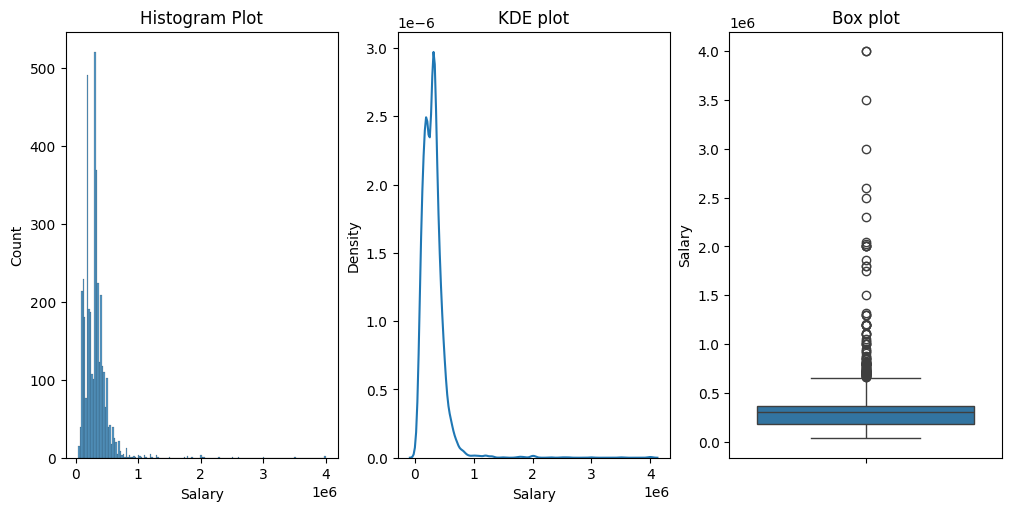



********************************************************************** Column: 10percentage **********************************************************************
min       43.000000
max       97.760000
mean      77.948633
median    79.200000
std        9.845458
skew      -0.596531
kurt      -0.095743
Name: 10percentage, dtype: float64


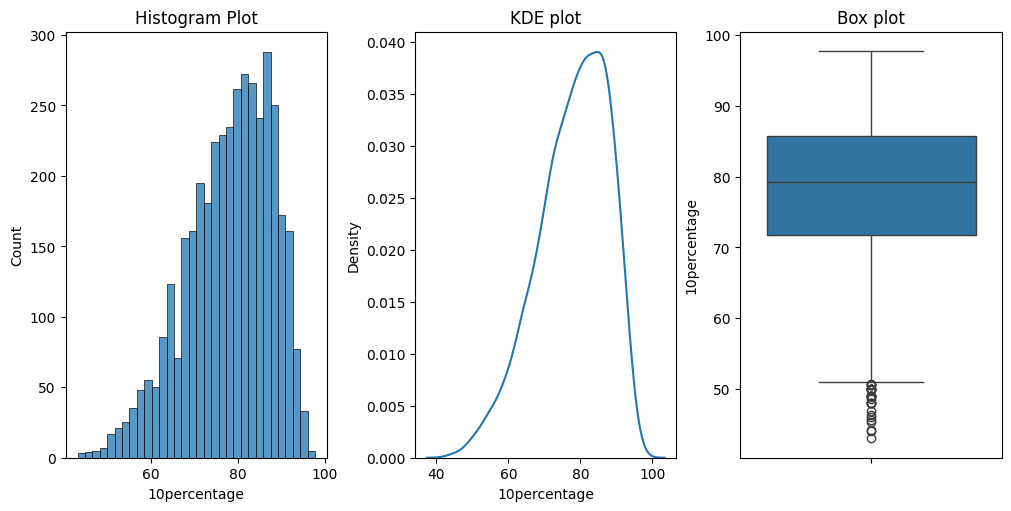



********************************************************************** Column: 12percentage **********************************************************************
min       40.000000
max       98.700000
mean      74.475950
median    74.400000
std       11.004427
skew      -0.036672
kurt      -0.627426
Name: 12percentage, dtype: float64


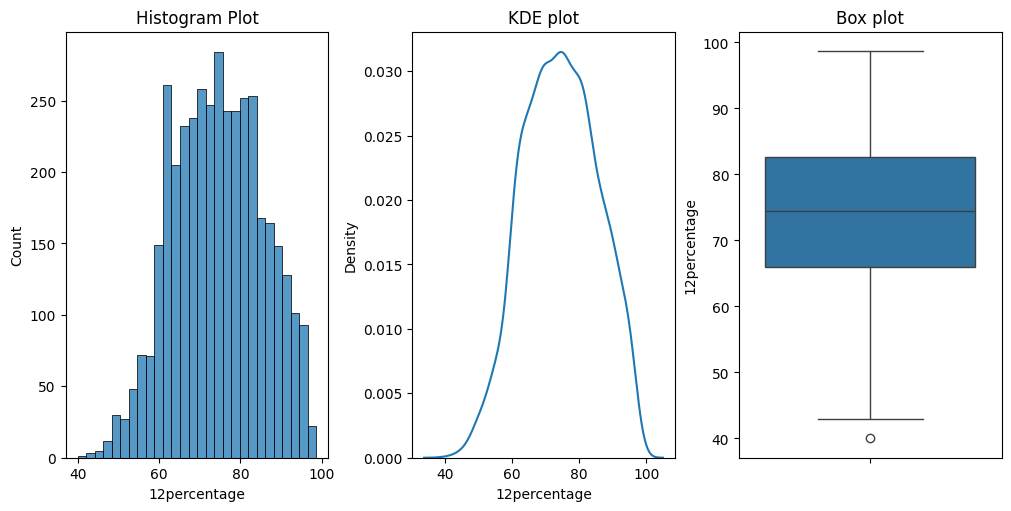



********************************************************************** Column: collegeGPA **********************************************************************
min       49.070000
max       99.930000
mean      71.702802
median    71.800000
std        7.417322
skew       0.170068
kurt       0.073169
Name: collegeGPA, dtype: float64


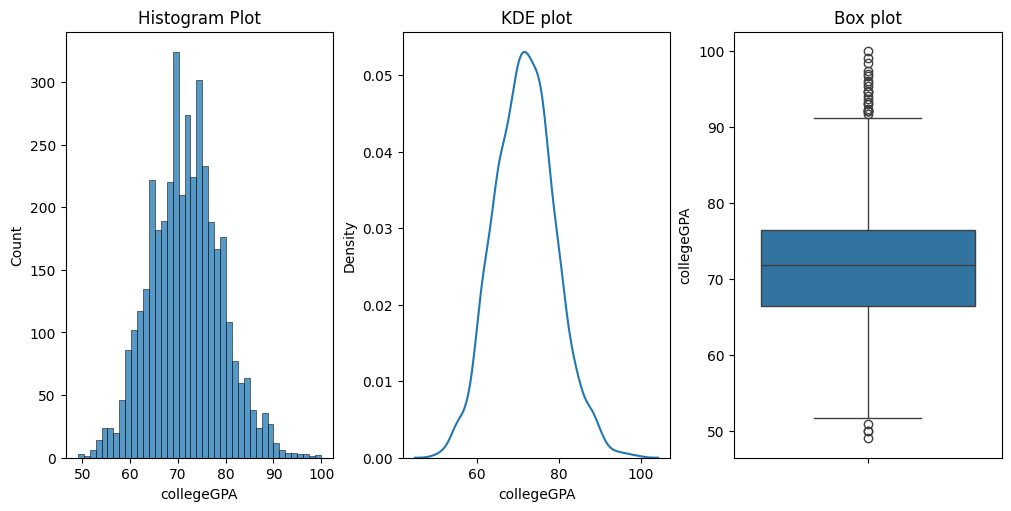



********************************************************************** Column: English **********************************************************************
min       180.000000
max       875.000000
mean      501.592471
median    500.000000
std       104.935965
skew        0.193771
kurt       -0.255348
Name: English, dtype: float64


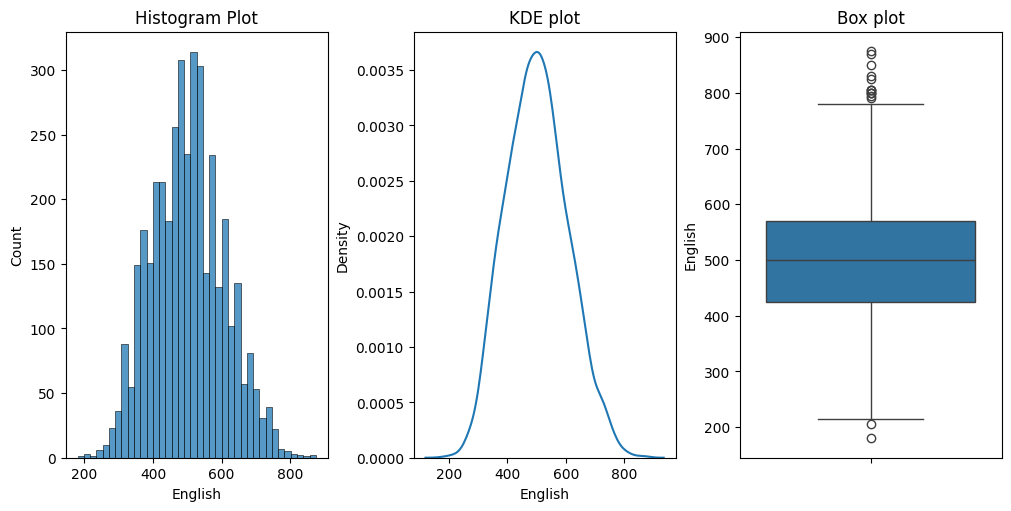



********************************************************************** Column: Logical **********************************************************************
min       195.000000
max       795.000000
mean      501.607377
median    505.000000
std        86.769459
skew       -0.215218
kurt       -0.225069
Name: Logical, dtype: float64


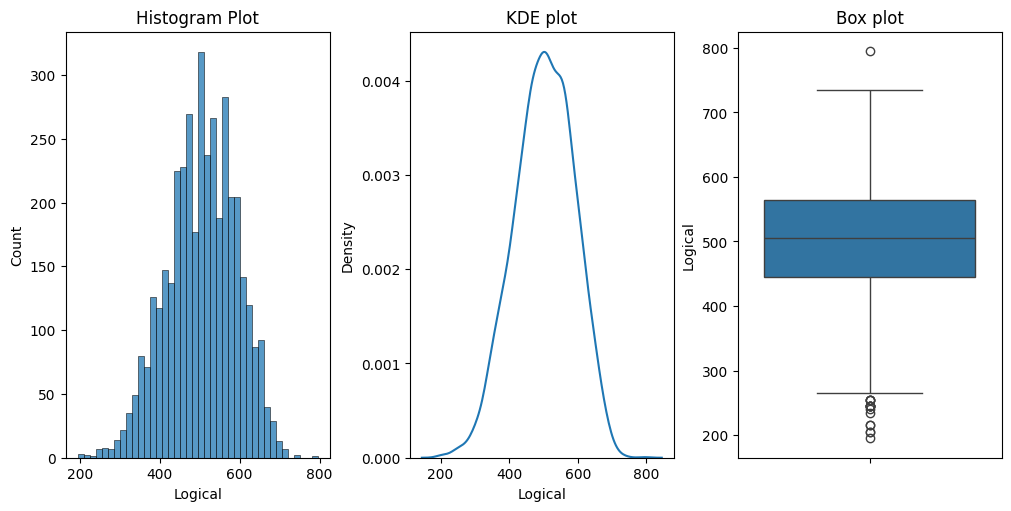



********************************************************************** Column: Quant **********************************************************************
min       120.000000
max       900.000000
mean      513.359272
median    515.000000
std       122.227017
skew       -0.019234
kurt       -0.099788
Name: Quant, dtype: float64


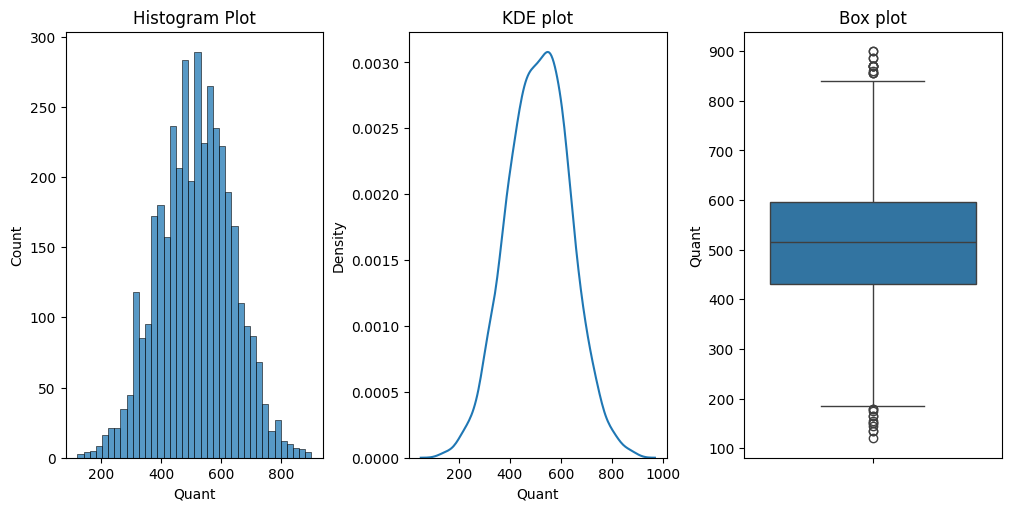



********************************************************************** Column: Domain **********************************************************************
min       0.002750
max       0.999910
mean      0.610710
median    0.649390
std       0.273130
skew     -0.392192
kurt     -0.955577
Name: Domain, dtype: float64


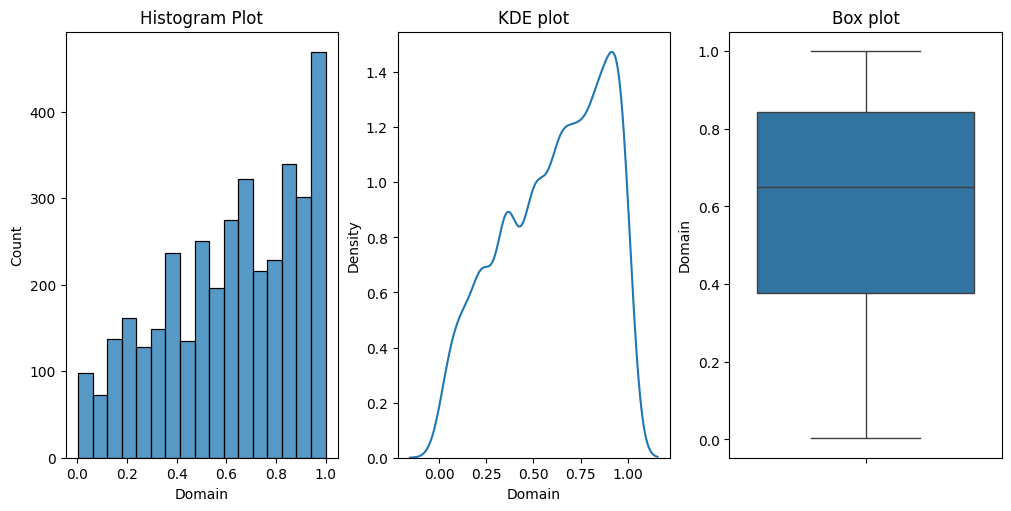



********************************************************************** Column: ComputerProgramming **********************************************************************
min       105.000000
max       840.000000
mean      451.605170
median    455.000000
std        97.417888
skew       -0.021596
kurt        0.406926
Name: ComputerProgramming, dtype: float64


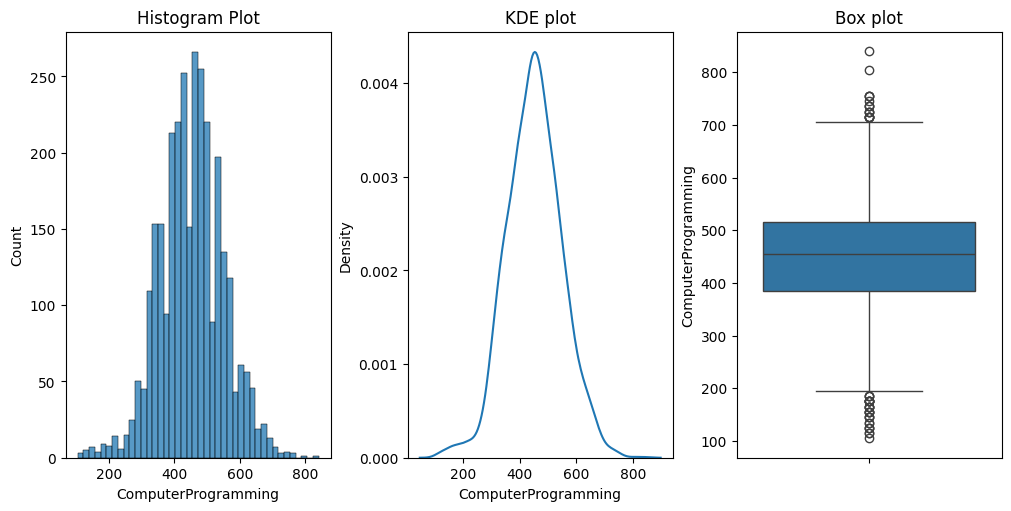



********************************************************************** Column: ElectronicsAndSemicon **********************************************************************
min       133.000000
max       612.000000
mean      336.023009
median    333.000000
std        81.454957
skew        0.273643
kurt       -0.036507
Name: ElectronicsAndSemicon, dtype: float64


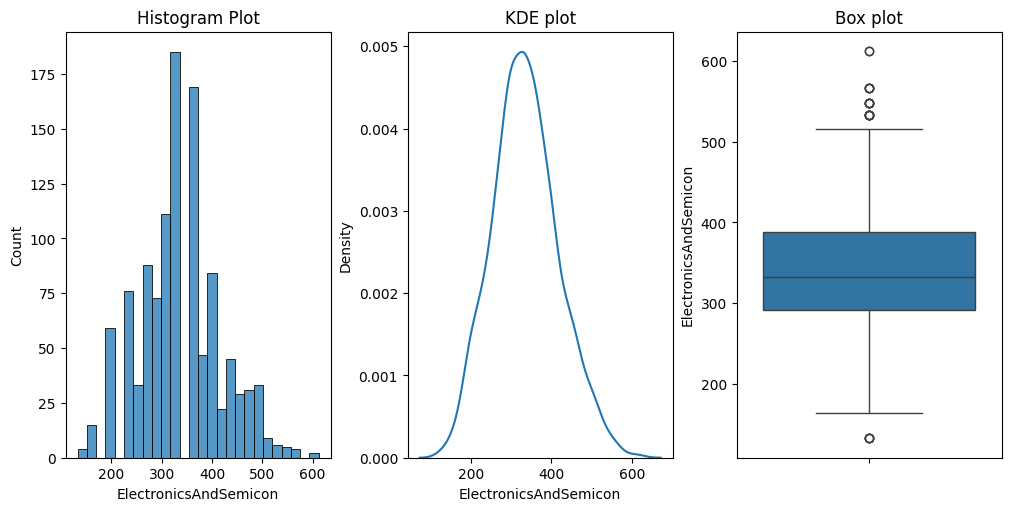



********************************************************************** Column: ComputerScience **********************************************************************
min       130.000000
max       715.000000
mean      406.134680
median    407.000000
std        89.950934
skew        0.374818
kurt        0.201132
Name: ComputerScience, dtype: float64


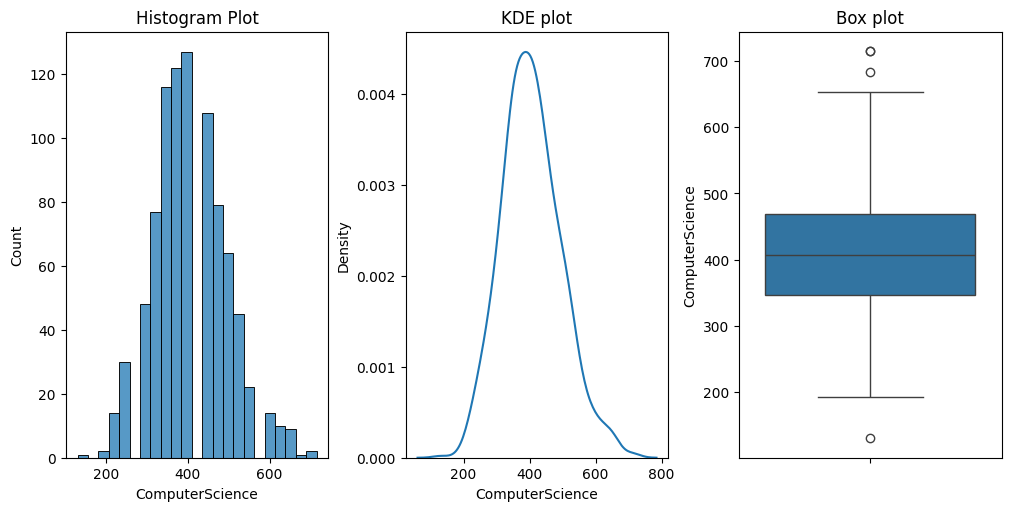



********************************************************************** Column: conscientiousness **********************************************************************
min      -4.126700
max       1.995300
mean     -0.040113
median    0.046400
std       1.027492
skew     -0.522993
kurt      0.114296
Name: conscientiousness, dtype: float64


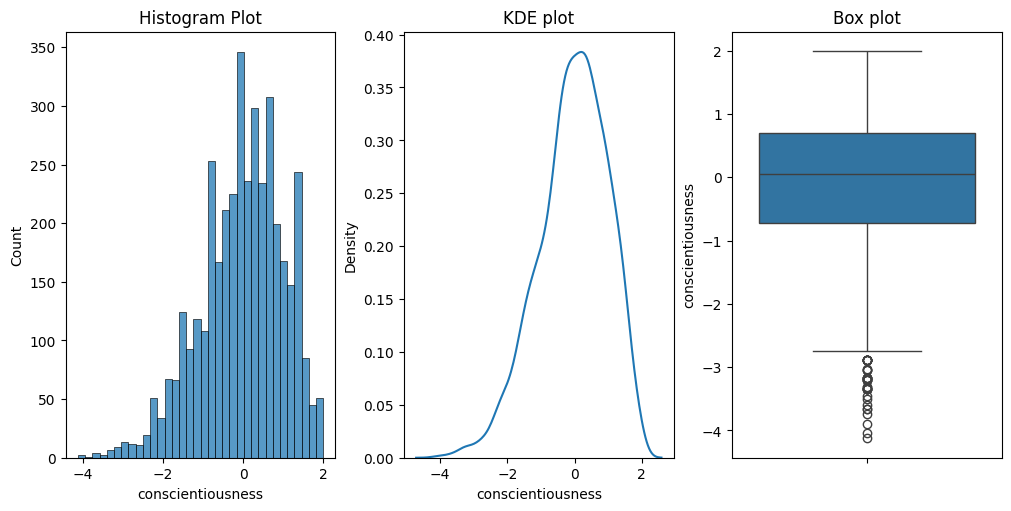



********************************************************************** Column: agreeableness **********************************************************************
min      -5.781600
max       1.904800
mean      0.144828
median    0.212400
std       0.942313
skew     -1.208386
kurt      3.414704
Name: agreeableness, dtype: float64


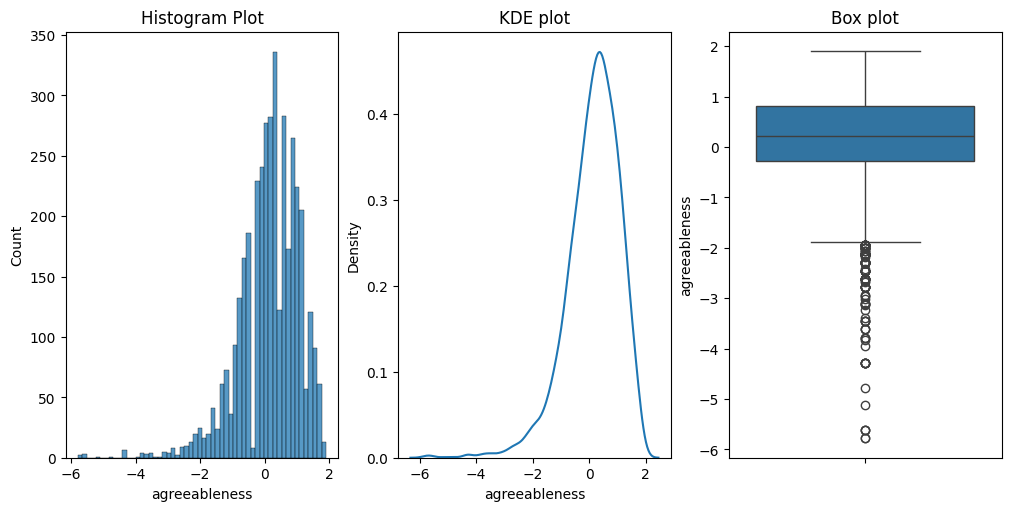



********************************************************************** Column: extraversion **********************************************************************
min      -4.600900
max       2.535400
mean     -0.001104
median    0.091400
std       0.952860
skew     -0.521898
kurt      0.635837
Name: extraversion, dtype: float64


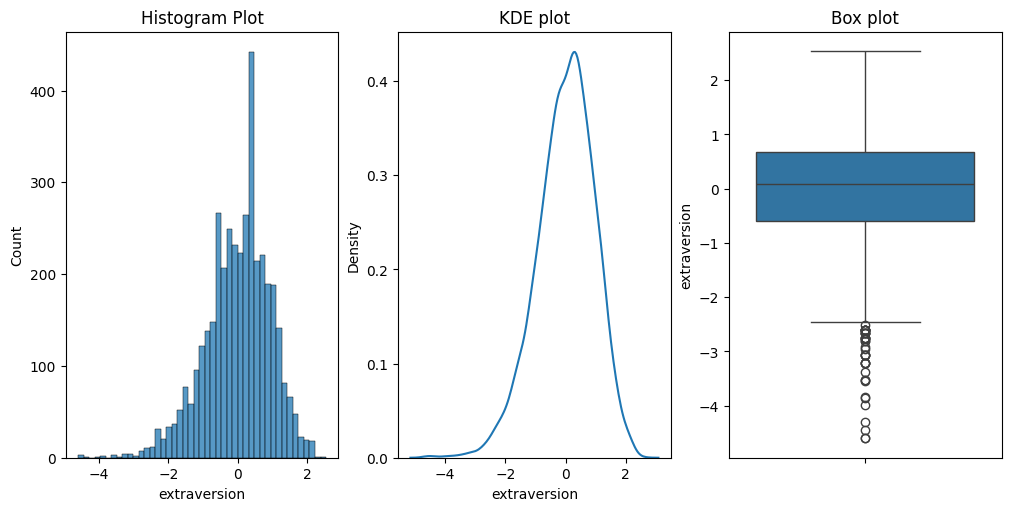



********************************************************************** Column: nueroticism **********************************************************************
min      -2.643000
max       3.352500
mean     -0.169251
median   -0.234400
std       1.006326
skew      0.167075
kurt     -0.196885
Name: nueroticism, dtype: float64


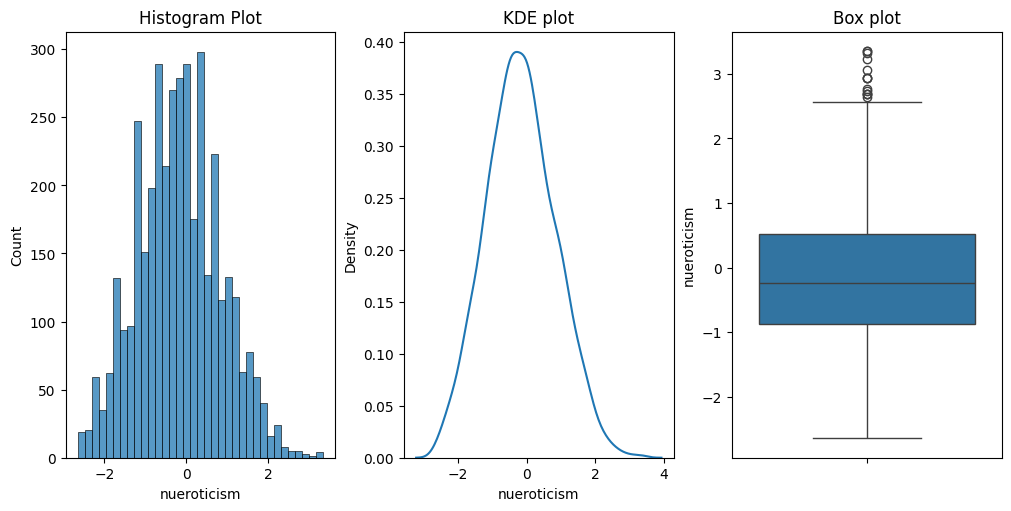



********************************************************************** Column: openess_to_experience **********************************************************************
min      -7.375700
max       1.822400
mean     -0.140694
median   -0.094300
std       1.007413
skew     -1.502125
kurt      5.785307
Name: openess_to_experience, dtype: float64


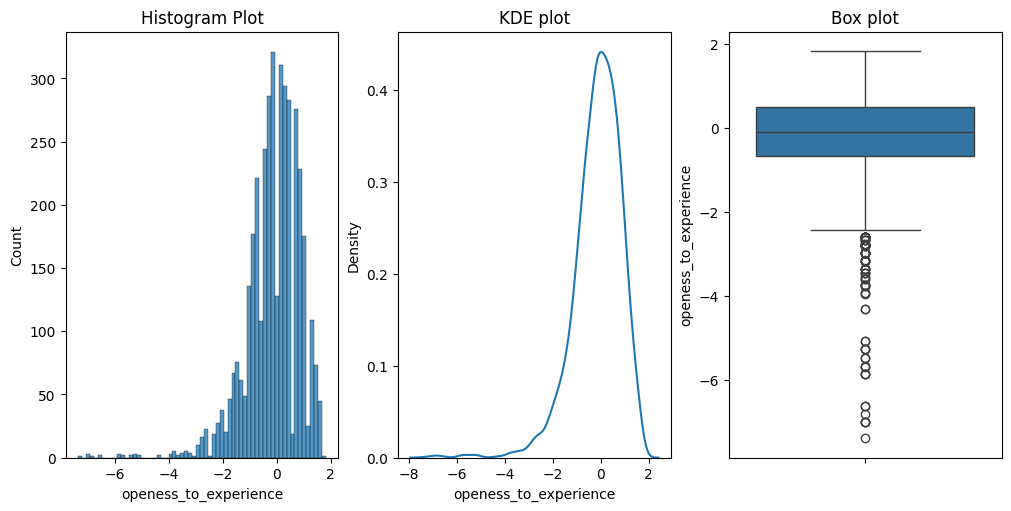

In [20]:
for col in numerical_df.columns:
    print("*"*70,f"Column: {col}", "*"*70)
    non_viz_num(numerical_df[col])
    viz_num(numerical_df[col])
    print("\n")


From the above plots we can see the outliers in columns("Salary", "agreeableness", "extraversion", "openess_to_experience") that is highly influencing the data

In [21]:
# Removing outliers of all numerical columns and plotiing them
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_num_no_outliers = numerical_df[~((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)]
print(df_num_no_outliers)


      Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
0     420000         84.30         95.80       78.00      515      585    525   
1     500000         85.40         85.00       70.06      695      610    780   
2     325000         85.00         68.20       70.00      615      545    370   
4     200000         78.00         76.80       73.90      545      625    465   
5     300000         89.92         87.00       76.32      560      555    620   
...      ...           ...           ...         ...      ...      ...    ...   
3993  280000         52.09         55.50       61.50      365      334    475   
3994  100000         90.00         93.00       77.30      415      410    535   
3995  320000         81.86         65.50       70.00      475      475    465   
3996  200000         78.72         69.88       70.42      450      410    320   
3997  400000         70.60         68.00       68.00      565      515    464   

        Domain  ComputerPro

********************************************************************** Column: Salary **********************************************************************
min        35000.000000
max       655000.000000
mean      287358.879039
median    300000.000000
std       125010.837753
skew           0.401788
kurt          -0.282815
Name: Salary, dtype: float64


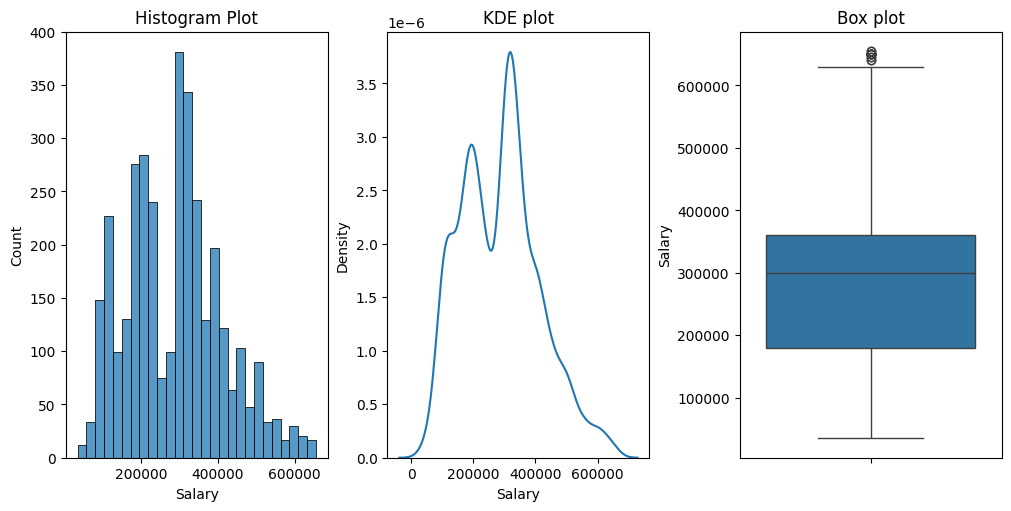



********************************************************************** Column: 10percentage **********************************************************************
min       51.000000
max       97.120000
mean      78.254518
median    79.400000
std        9.428679
skew      -0.502540
kurt      -0.338269
Name: 10percentage, dtype: float64


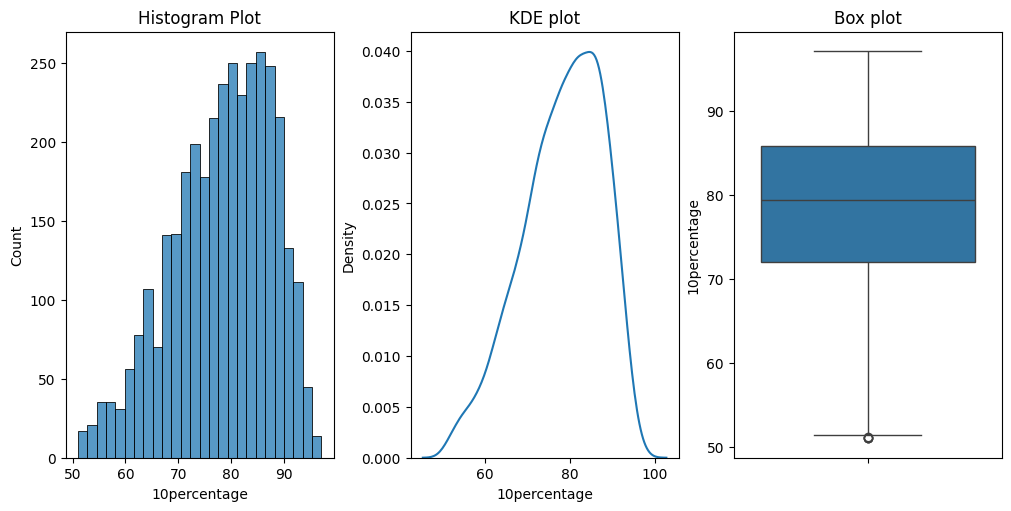



********************************************************************** Column: 12percentage **********************************************************************
min       43.000000
max       98.200000
mean      74.577835
median    74.400000
std       10.867832
skew      -0.009137
kurt      -0.642168
Name: 12percentage, dtype: float64


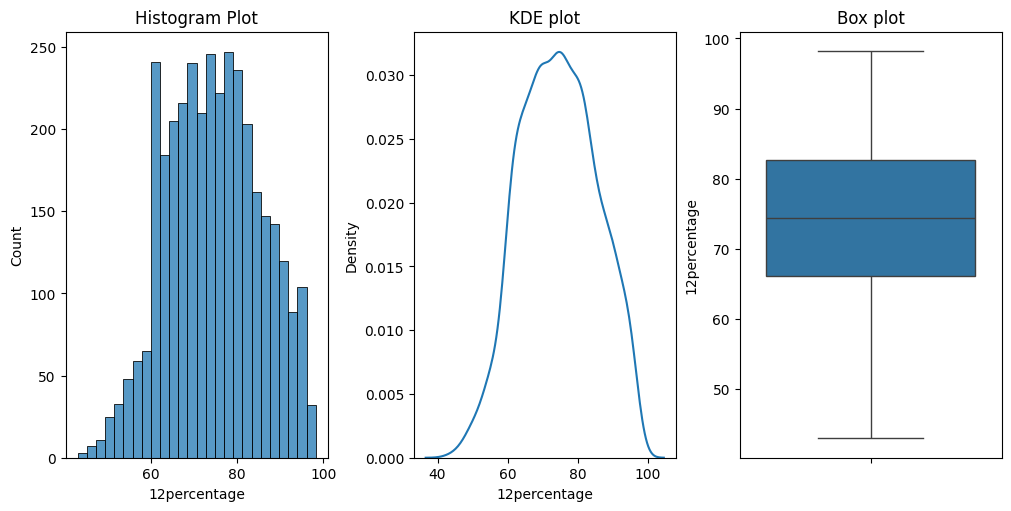



********************************************************************** Column: collegeGPA **********************************************************************
min       51.800000
max       91.200000
mean      71.644564
median    71.800000
std        7.134555
skew       0.072999
kurt      -0.211893
Name: collegeGPA, dtype: float64


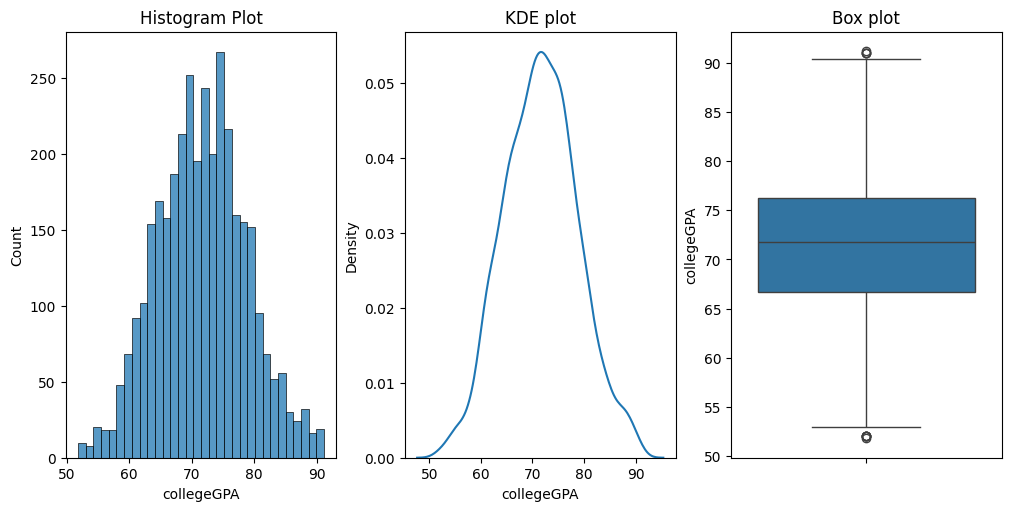



********************************************************************** Column: English **********************************************************************
min       215.000000
max       780.000000
mean      502.266800
median    500.000000
std       102.370578
skew        0.148121
kurt       -0.398329
Name: English, dtype: float64


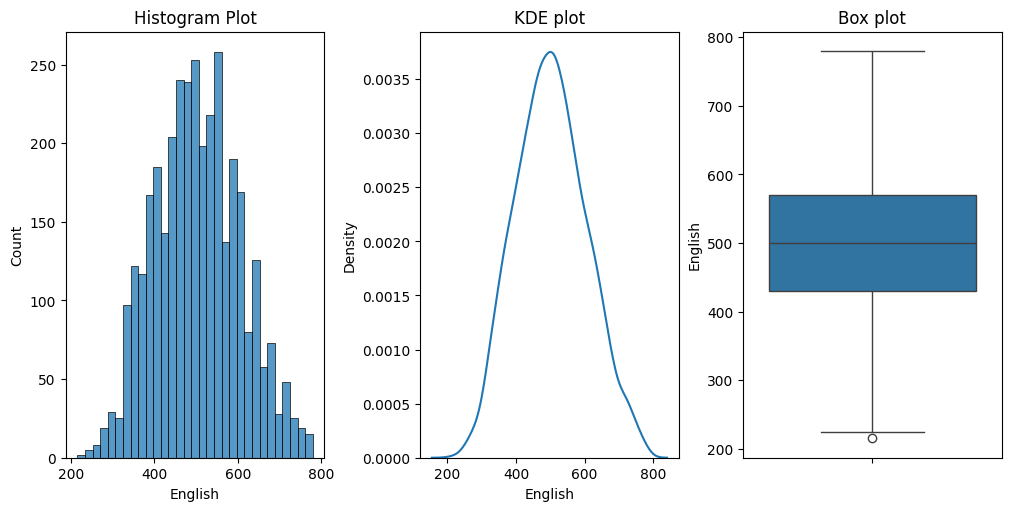



********************************************************************** Column: Logical **********************************************************************
min       265.000000
max       735.000000
mean      504.014870
median    505.000000
std        83.310888
skew       -0.144143
kurt       -0.400763
Name: Logical, dtype: float64


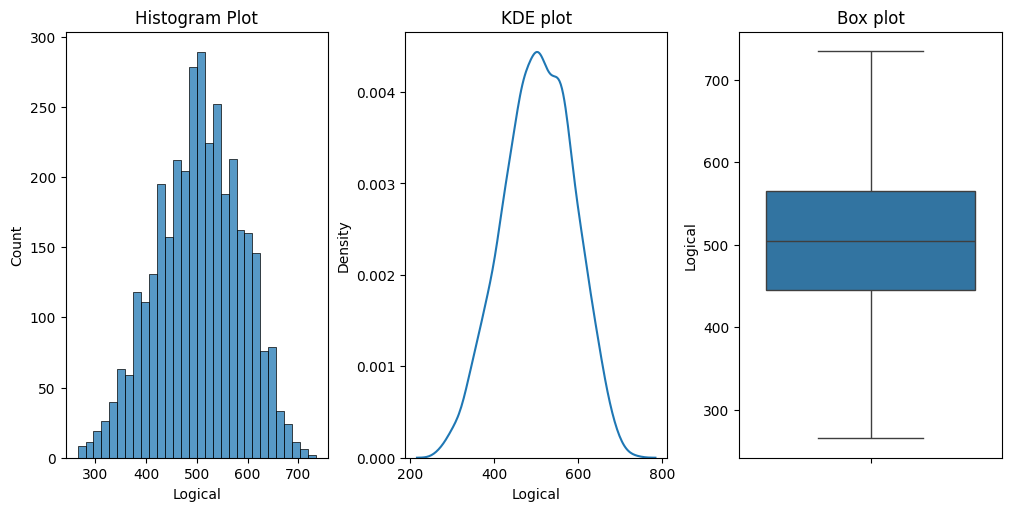



********************************************************************** Column: Quant **********************************************************************
min       185.000000
max       840.000000
mean      512.911639
median    515.000000
std       117.619251
skew       -0.002831
kurt       -0.297791
Name: Quant, dtype: float64


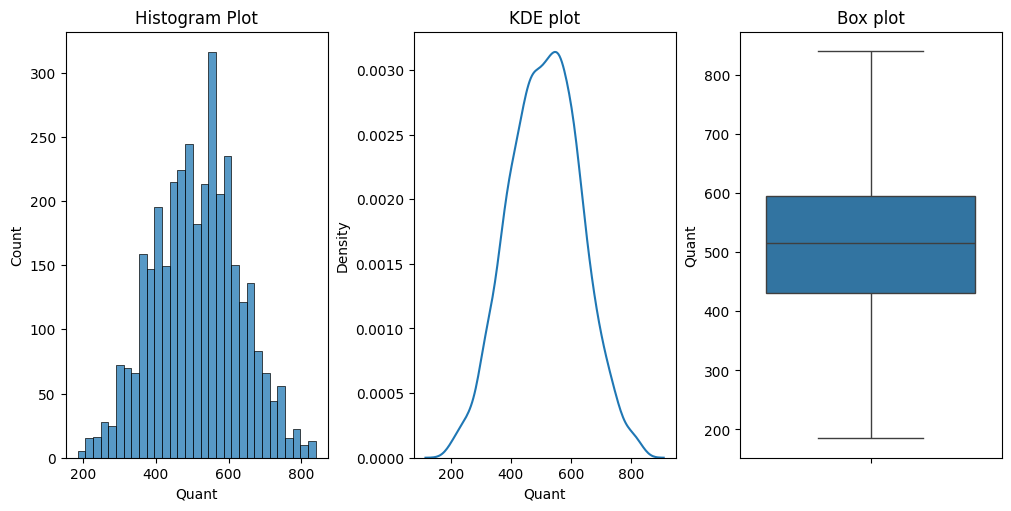



********************************************************************** Column: Domain **********************************************************************
min       0.010995
max       0.998876
mean      0.609196
median    0.649390
std       0.270512
skew     -0.399874
kurt     -0.943194
Name: Domain, dtype: float64


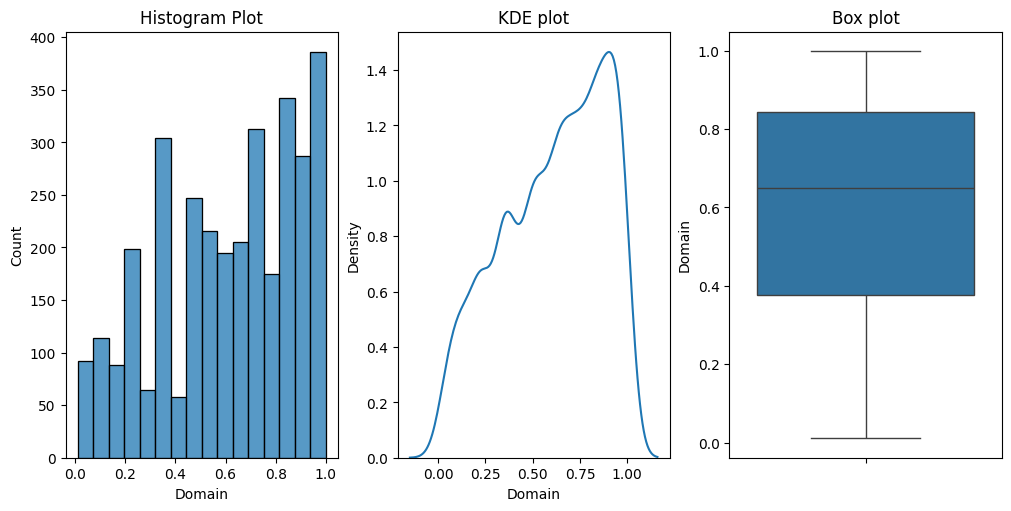



********************************************************************** Column: ComputerProgramming **********************************************************************
min       195.000000
max       705.000000
mean      452.528530
median    455.000000
std        89.681261
skew        0.071347
kurt       -0.167550
Name: ComputerProgramming, dtype: float64


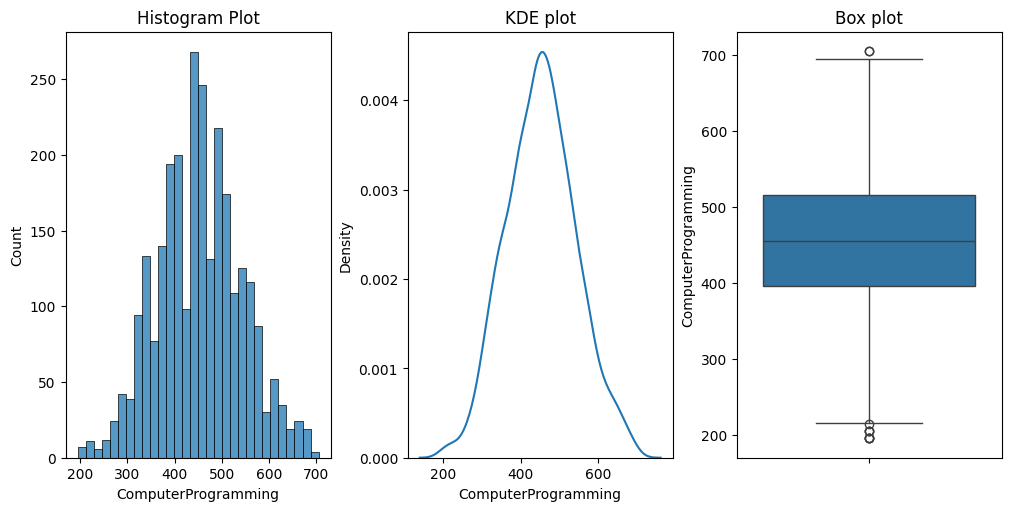



********************************************************************** Column: ElectronicsAndSemicon **********************************************************************
min       164.000000
max       516.000000
mean      333.058943
median    333.000000
std        76.733998
skew        0.118314
kurt       -0.418003
Name: ElectronicsAndSemicon, dtype: float64


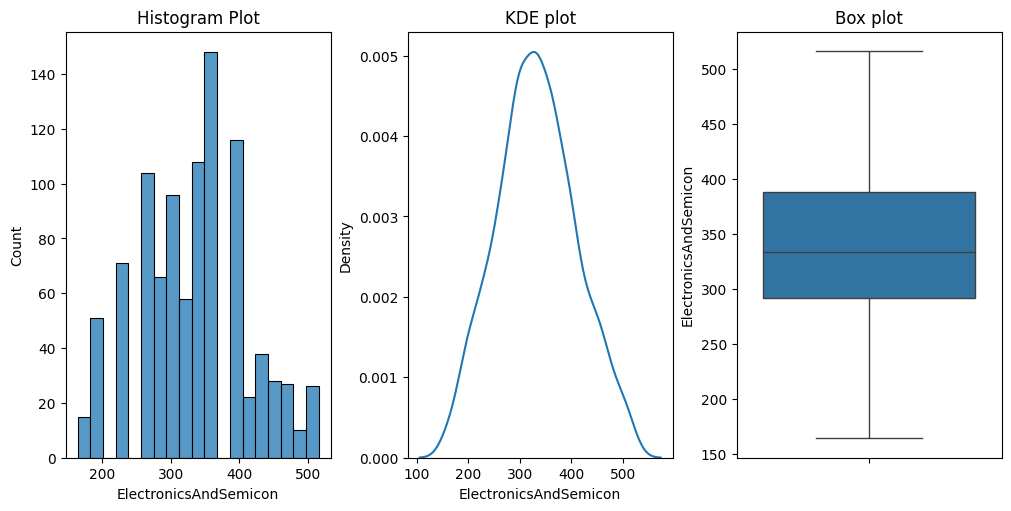



********************************************************************** Column: ComputerScience **********************************************************************
min       192.000000
max       653.000000
mean      405.446341
median    407.000000
std        87.109692
skew        0.280852
kurt       -0.100915
Name: ComputerScience, dtype: float64


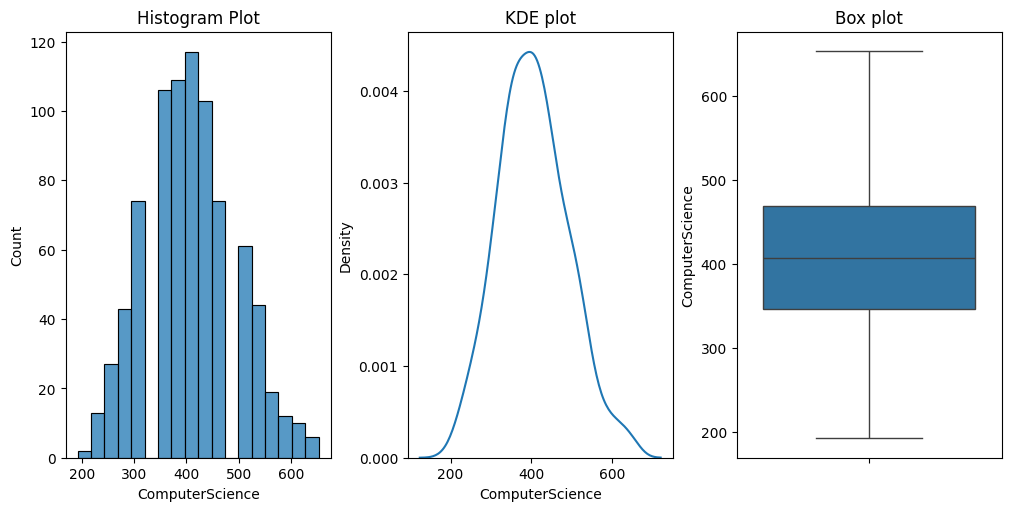



********************************************************************** Column: conscientiousness **********************************************************************
min      -2.744300
max       1.995300
mean      0.047189
median    0.128200
std       0.955226
skew     -0.365168
kurt     -0.317825
Name: conscientiousness, dtype: float64


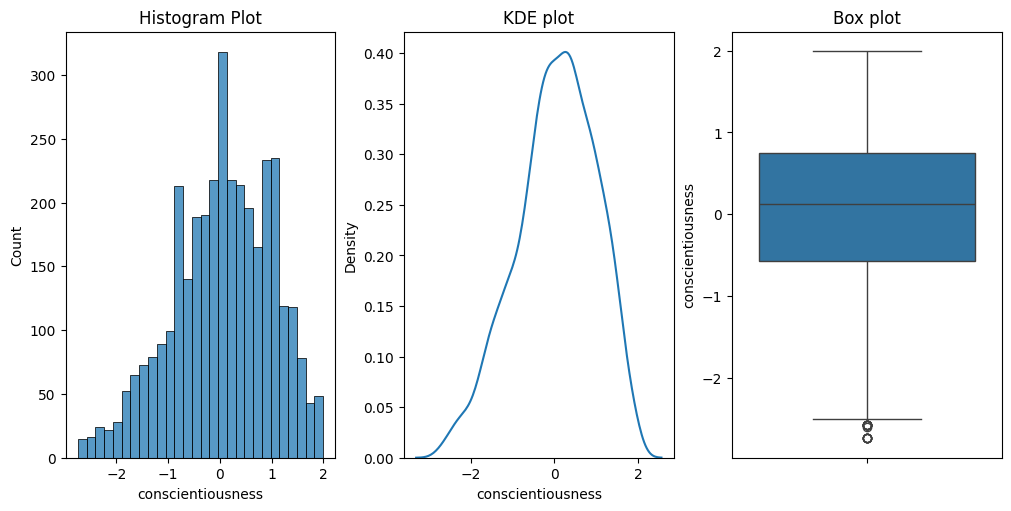



********************************************************************** Column: agreeableness **********************************************************************
min      -1.885500
max       1.904800
mean      0.254496
median    0.344800
std       0.765257
skew     -0.293060
kurt     -0.390780
Name: agreeableness, dtype: float64


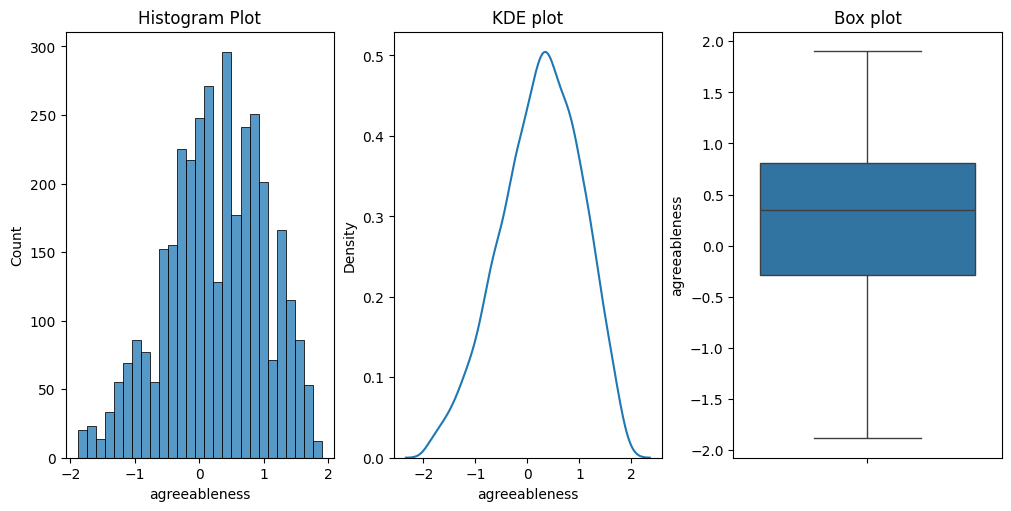



********************************************************************** Column: extraversion **********************************************************************
min      -2.449100
max       2.161700
mean      0.071482
median    0.163700
std       0.878164
skew     -0.245298
kurt     -0.249894
Name: extraversion, dtype: float64


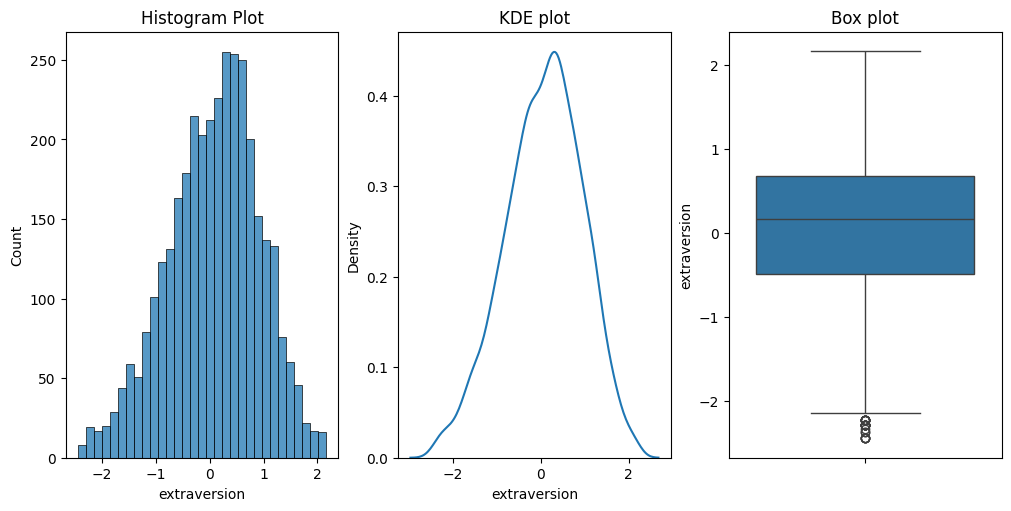



********************************************************************** Column: nueroticism **********************************************************************
min      -2.643000
max       2.554600
mean     -0.194180
median   -0.234400
std       0.993593
skew      0.100380
kurt     -0.385696
Name: nueroticism, dtype: float64


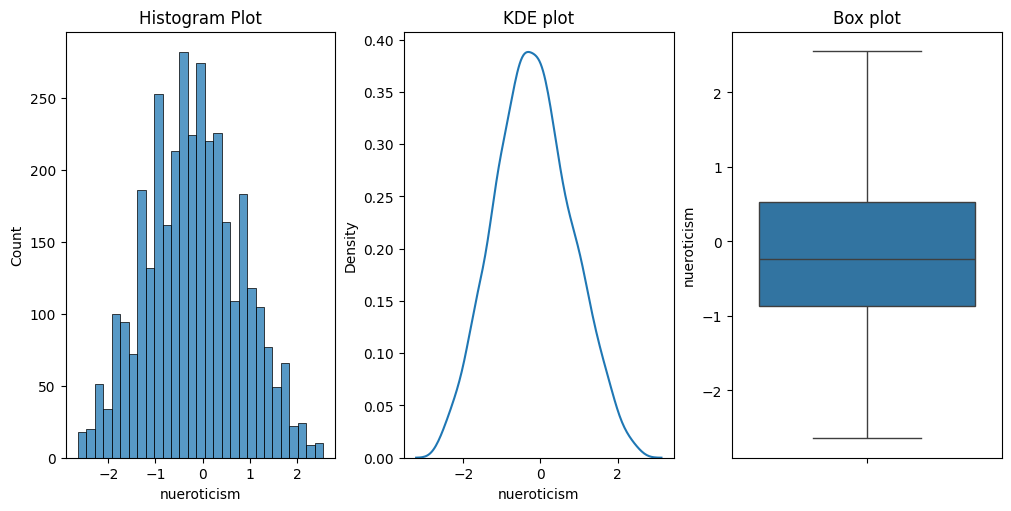



********************************************************************** Column: openess_to_experience **********************************************************************
min      -2.420200
max       1.822400
mean     -0.032053
median    0.028400
std       0.817775
skew     -0.348416
kurt     -0.214680
Name: openess_to_experience, dtype: float64


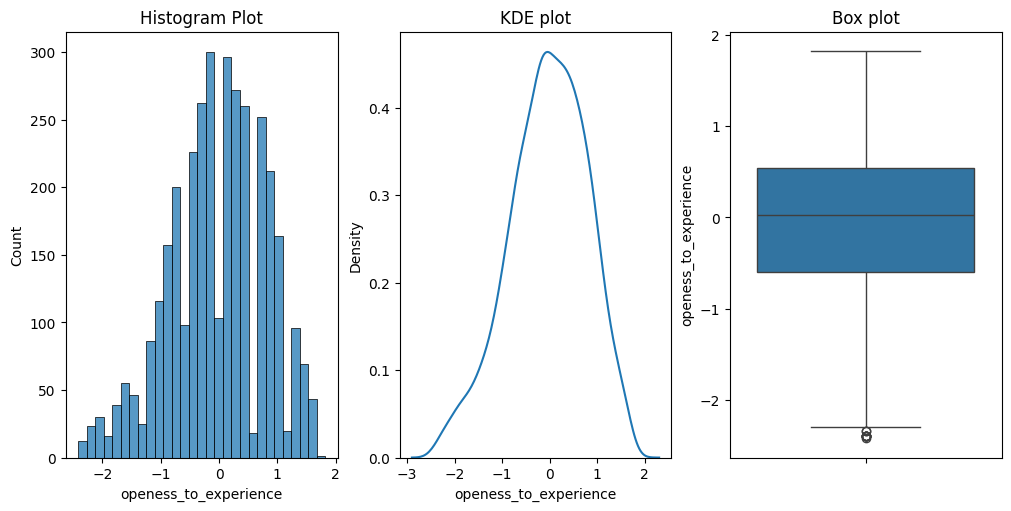

In [22]:
# potting after removing outliers
for col in numerical_df.columns:
    print("*"*70,f"Column: {col}", "*"*70)
    non_viz_num(df_num_no_outliers[col])
    viz_num(df_num_no_outliers[col])
    print("\n")

skewness


*   Negative/left skewed -> tail extending more to the left
*   positive/right skewed -> tail extending more to the right
*   Zero Skewness -> symmetric disstribution

KUrtosis

*   Leptokurtic -> Heavier Tail and Sharper Peak(>3)
*   platykurtic -> Lighter Tail and Flatter Peak(<3)
*   Mesokurtic -> similar peakedness and (tail =3)



**Observations for Numerical Columns**

| Columns               | Histogram Plot      | KDE Plot           | Box Plot           |
|-----------------------|---------------------|--------------------|--------------------|
| Salary                | non-uniform         | right skewed     | average=300k     |
| 10percentage          | non-uniform     | left skewed     | average marks = 80%     |
| 12percentage          | non-uniform     | left skewed      | average marks = 74%     |
| collegeGPA            | non-uniform     | almost zero skewness     | average marks=71%     |
| English               | non-uniform     | almost zero skewness     | average marks =502     |
| Logical               | non-uniform     | left skewed     | 504.0148     |
| Quant                 | non-uniform     | Zero skewness     | mean = 512.16     |
| Domain                | non-uniform     | Negative skewness     | mean=0.609     |
| ComputerProgramming   | non-uniform     | Zero skewness     | mean = 452.53     |
| ElectronicsAndSemicon | non-uniform     | positive skewness     | 333.33     |
| ComputerScience       | non-uniform     | positive skewness     | mean = 405.44     |
| conscientiousness     | non-uniform     | Negatve skewness     | 0.04     |
| agreeableness         | non-uniform     | Negative skewness     | 0.25     |
| extraversion          | non-uniform     | Negative skewness     | mean = 0.07     |
| nueroticism           | non-uniform     | positive skewness     | mean = -0.19     |
| openess_to_experience | non-uniform     | negative skewness     | average =0      |


********************************************************************** Column: Designation **********************************************************************
count                                                   3958
nunique                                                  417
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Designation
software engineer                    537
software developer                   263
system engineer                      203
programmer analyst                   139
systems engineer                     117
                                    ... 
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
delivery software engineer             1
jr. software developer                 1
Name: count, Length: 417, dtype: int64


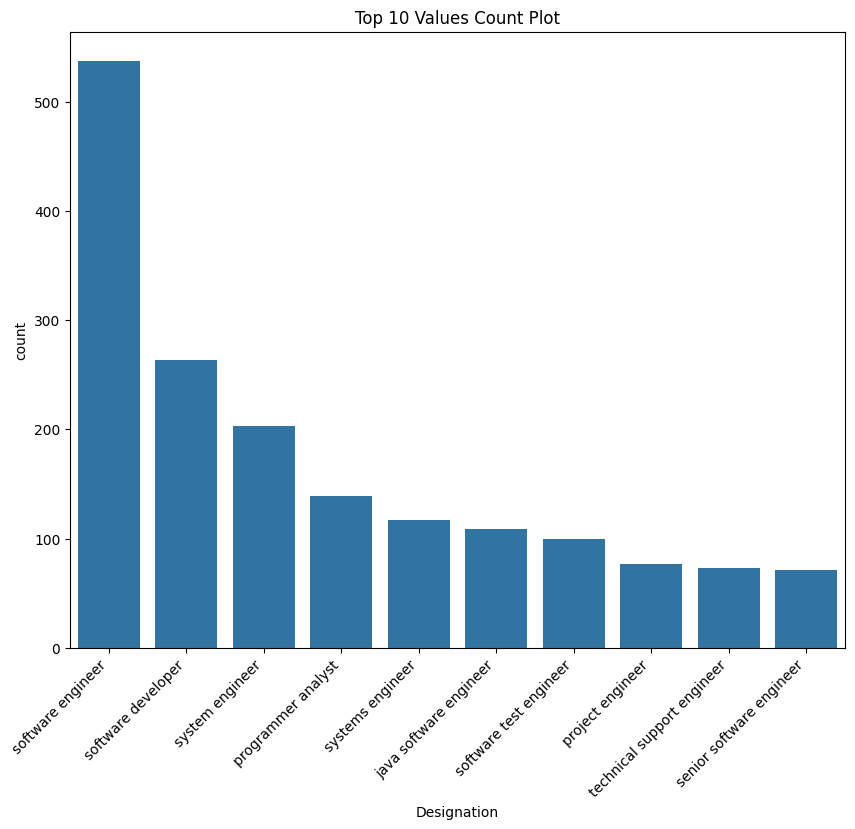



********************************************************************** Column: JobCity **********************************************************************
count                                                   3509
nunique                                                  337
unique     [Bangalore, Indore, Chennai, Gurgaon, Manesar,...
Name: JobCity, dtype: object
JobCity
Bangalore           626
Noida               362
Hyderabad           331
Pune                287
Chennai             270
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: count, Length: 337, dtype: int64


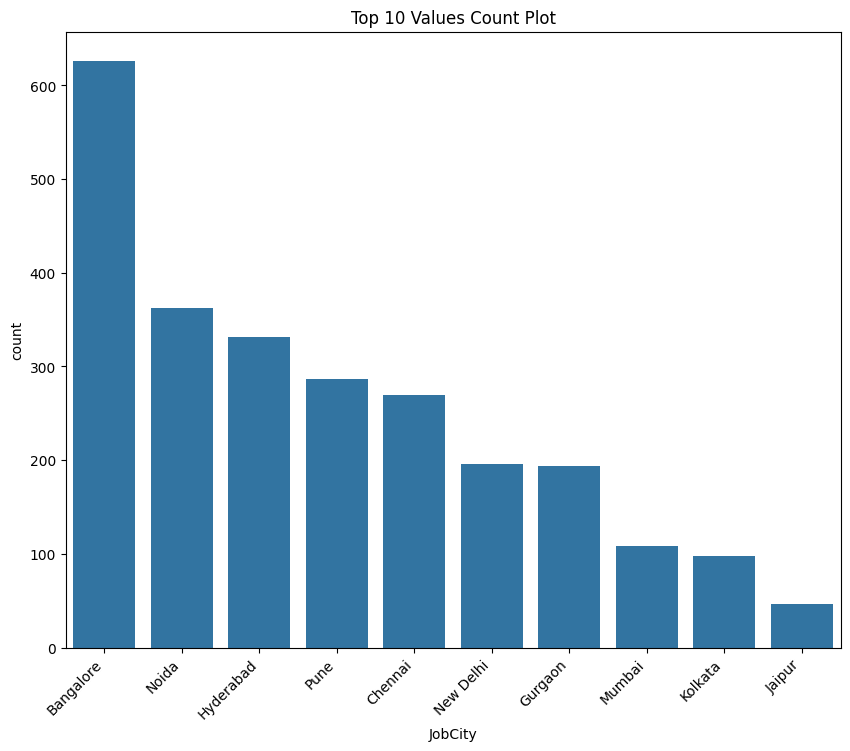



********************************************************************** Column: Gender **********************************************************************
count        3958
nunique         2
unique     [f, m]
Name: Gender, dtype: object
Gender
m    3009
f     949
Name: count, dtype: int64


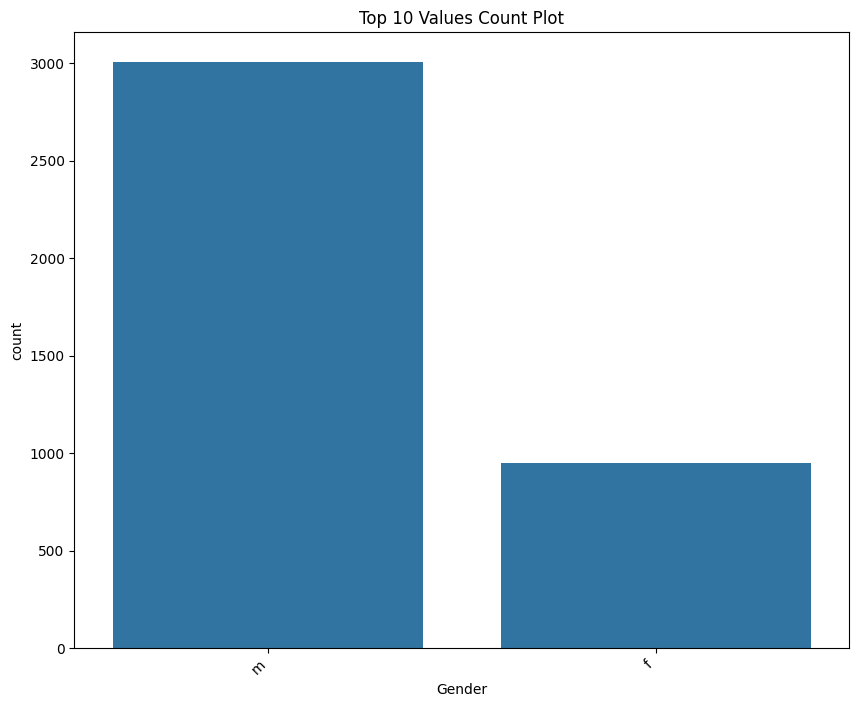



********************************************************************** Column: 10board **********************************************************************
count                                                   3608
nunique                                                  274
unique     [board ofsecondary education,ap, cbse, state b...
Name: 10board, dtype: object
10board
cbse                          1379
state board                   1146
icse                           278
ssc                            122
up board                        85
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: count, Length: 274, dtype: int64


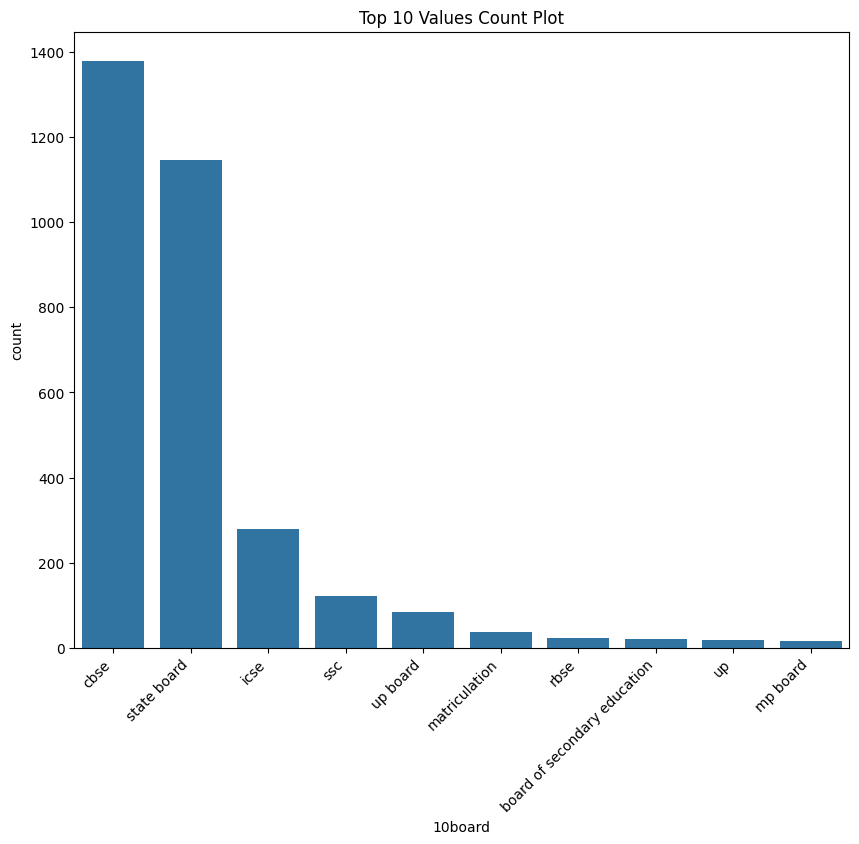



********************************************************************** Column: 12board **********************************************************************
count                                                   3599
nunique                                                  339
unique     [board of intermediate education,ap, cbse, sta...
Name: 12board, dtype: object
12board
cbse                                1383
state board                         1235
icse                                 128
up board                              87
isc                                   45
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: count, Length: 339, dtype: int64


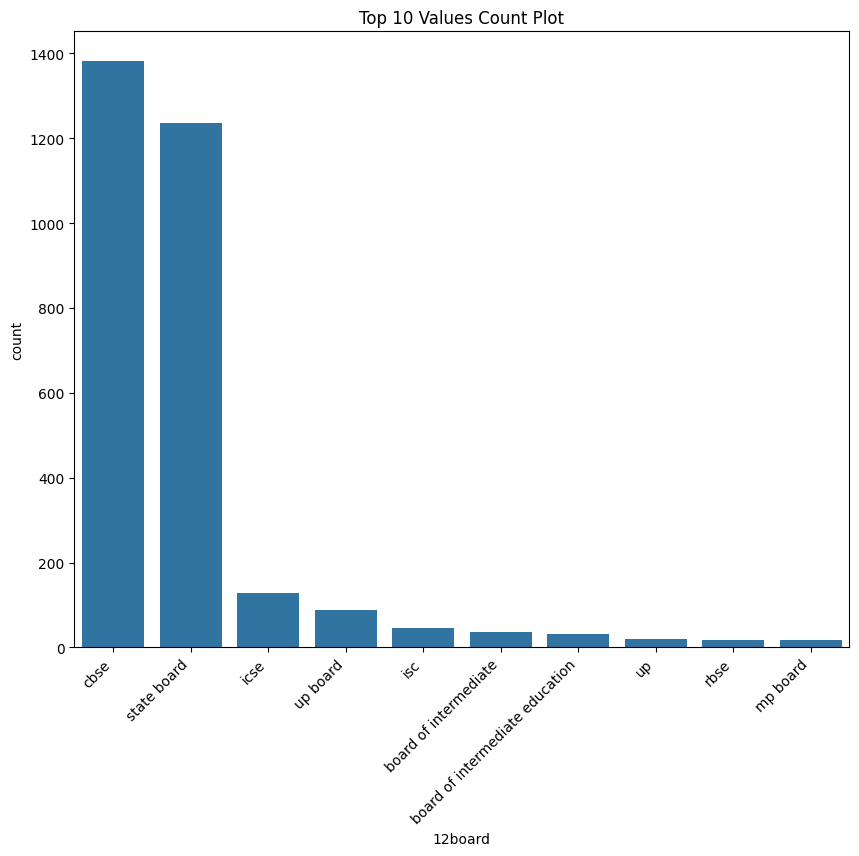



********************************************************************** Column: Degree **********************************************************************
count                                                 3958
nunique                                                  4
unique     [B.Tech/B.E., MCA, M.Tech./M.E., M.Sc. (Tech.)]
Name: Degree, dtype: object
Degree
B.Tech/B.E.      3663
MCA               240
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64


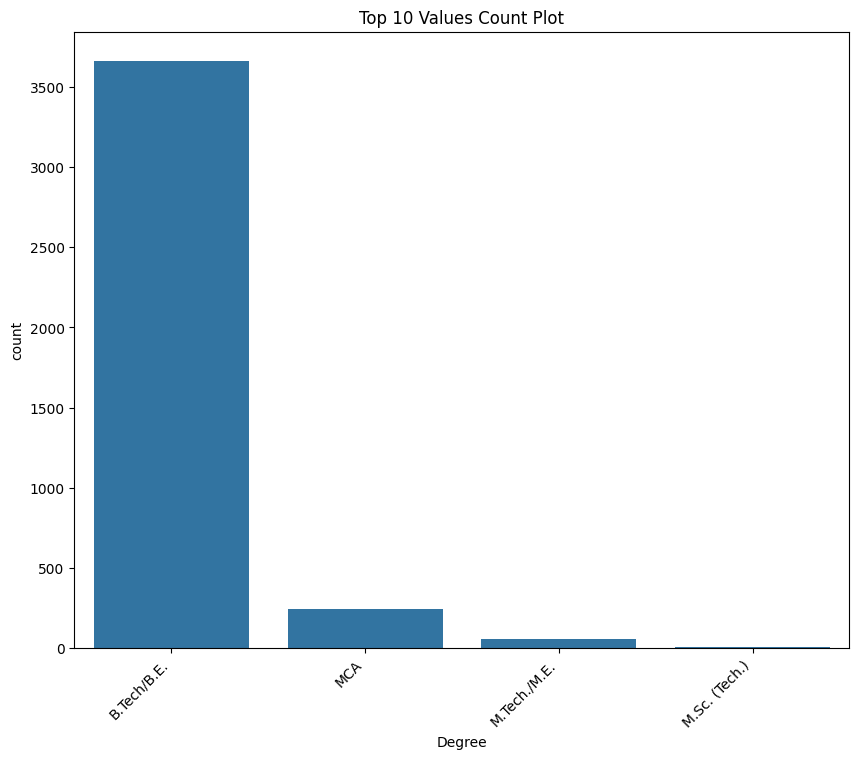



********************************************************************** Column: Specialization **********************************************************************
count                                                   3958
nunique                                                   46
unique     [computer engineering, electronics and communi...
Name: Specialization, dtype: object
Specialization
electronics and communication engineering      867
computer science & engineering                 735
information technology                         657
computer engineering                           596
computer application                           241
mechanical engineering                         201
electronics and electrical engineering         192
electronics & telecommunications               120
electrical engineering                          80
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engine

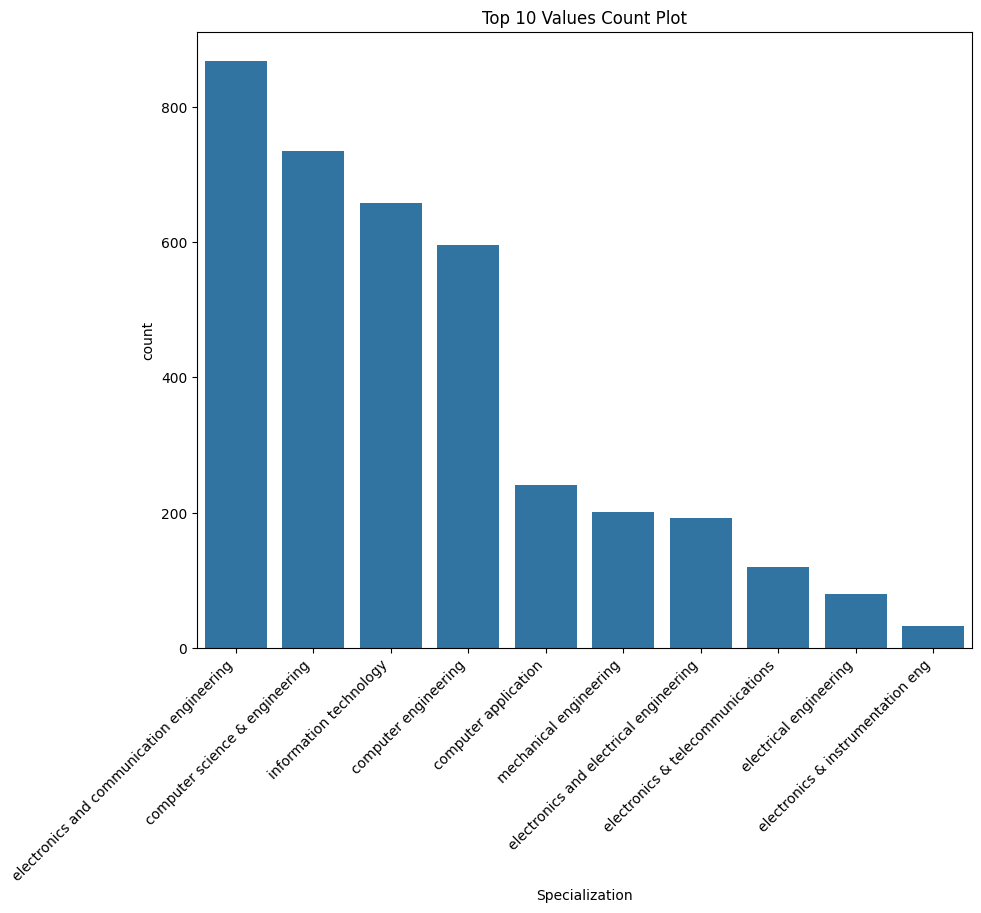



********************************************************************** Column: CollegeState **********************************************************************
count                                                   3958
nunique                                                   26
unique     [Andhra Pradesh, Madhya Pradesh, Uttar Pradesh...
Name: CollegeState, dtype: object
CollegeState
Uttar Pradesh        905
Karnataka            369
Tamil Nadu           363
Telangana            314
Maharashtra          260
Andhra Pradesh       223
West Bengal          195
Madhya Pradesh       189
Punjab               189
Haryana              177
Orissa               172
Rajasthan            170
Delhi                161
Uttarakhand          112
Kerala                33
Jharkhand             27
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Goa  

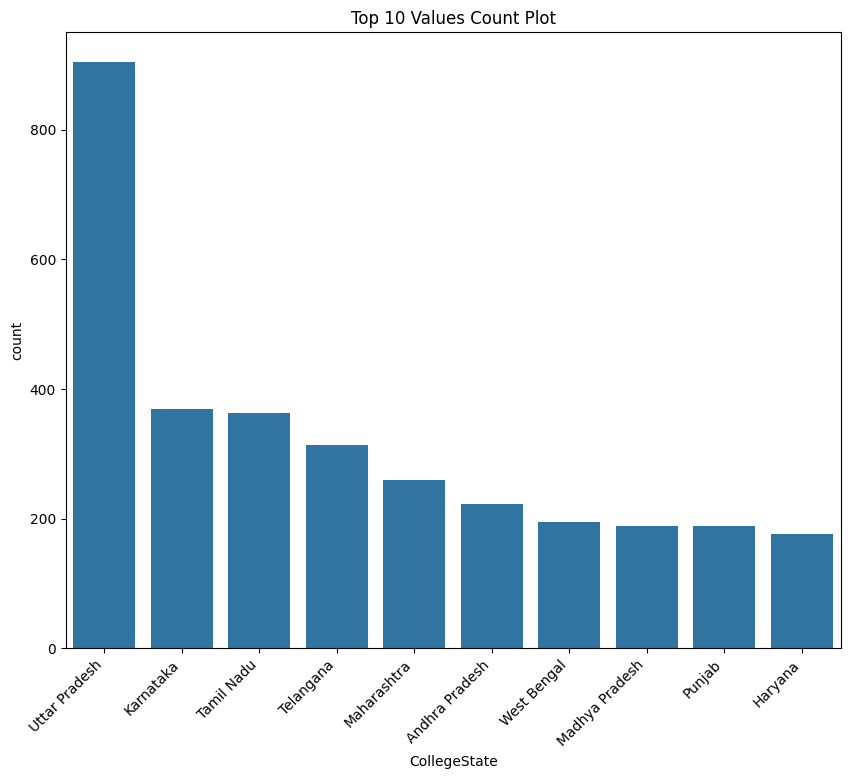

In [23]:
for col in discrete_df.columns:
    print("*"*70,f"Column: {col}", "*"*70)
    non_viz_cat(discrete_df[col])
    viz_cat(col)
    print("\n")

In [24]:
discrete_df["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [25]:
discrete_df["JobCity"].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', nan, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Kanpur ',
       'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI', 'Vijayawada',
       'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida', 'Siliguri ',
       'raipur', 'gurgaon', 'Bhopal', '

From above we can see the hogh number of spellong mistakes on columns ("Designation", "JobCity")


So fixing it

In [26]:
designation_choices = ['.net developer', 'account manager', 'assistant system engineer', 'associate software engineer', 'assistant manager',
          'business system analyst', 'clerical', 'customer service', 'electrical engineer', 'executive engineer', 'field engineer',
          'front end developer', 'graduate trainee', 'jr. software developer', 'software engineer', 'software tester', 'software trainee',
          'system analyst', 'system administrator', 'system engineer', 'team lead']

job_city_choices = ["Chennai", "Delhi", "Mumbai", "Pune", "Bangalore", "ariyalur", "Ahmedabad", "Ambala", "Bhopal", "Bhubaneswar", "Chandigarh",
          "Chennai", "Gurgaon", "Gandhi Nagar", "Gaziabaad", "Noida", "Hyderabad", "Jaipur", "Kanpur", "Kochi", "Kolkata",
          "Kota", "Lucknow", "Madurai", "Mysore", "Nagpur", "Panchkula", "Pune", "Ranchi", "Siliguri", "Tirupati", "Trivandrum"]

In [27]:
!pip install tqdm fuzzywuzzy

In [28]:
from tqdm import tqdm
tqdm.pandas()

from fuzzywuzzy import process

def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

df["designation_preprocessed"] = df["Designation"].progress_apply(lambda x :correct_spelling_errors(x, designation_choices))
# df["jobcity_preprocessed"] = df["JobCity"].progress_apply(lambda x :correct_spelling_errors(x, job_city_choices))


100%|██████████| 3958/3958 [00:51<00:00, 77.42it/s] 


In [29]:
df["jobcity_preprocessed"] = df["JobCity"].progress_apply(lambda x :correct_spelling_errors(str(x), job_city_choices) if pd.notna(x) else x)

100%|██████████| 3958/3958 [00:40<00:00, 98.87it/s] 


In [30]:
df["designation_preprocessed"].nunique()

186

In [31]:
df["jobcity_preprocessed"].nunique()

212

********************************************************************** Column: designation_preprocessed **********************************************************************
count                                                   3958
nunique                                                  186
unique     [field engineer, assistant manager, system eng...
Name: designation_preprocessed, dtype: object
designation_preprocessed
software engineer             864
jr. software developer        489
assistant system engineer     435
system engineer               332
field engineer                184
                             ... 
administrative coordinator      1
operational executive           1
web designer and seo            1
project administrator           1
research scientist              1
Name: count, Length: 186, dtype: int64


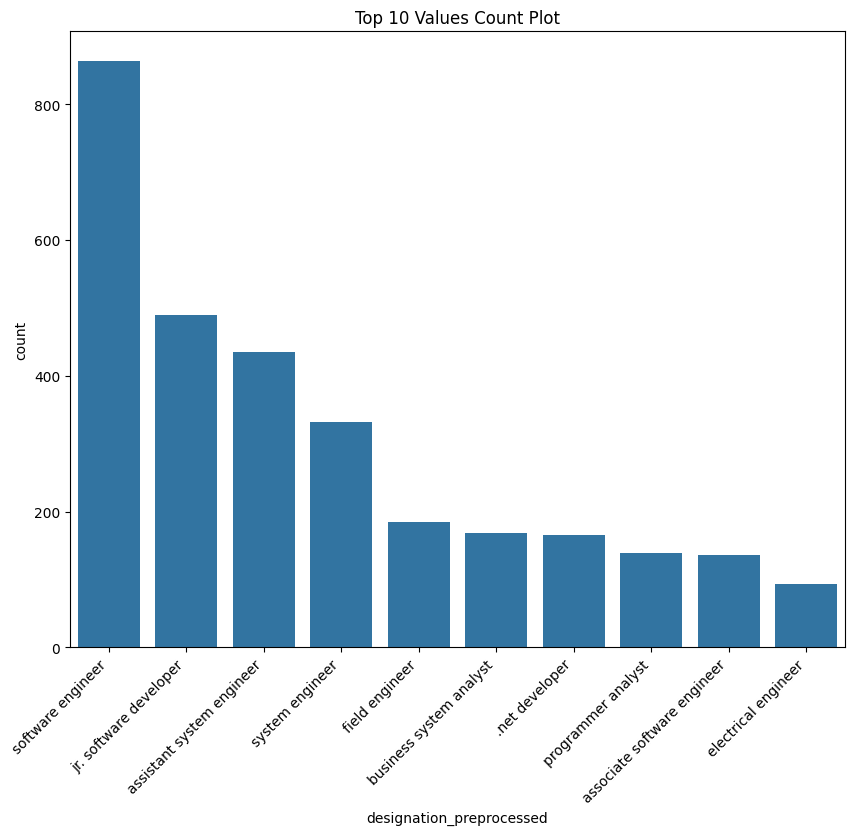



********************************************************************** Column: jobcity_preprocessed **********************************************************************
count                                                   3509
nunique                                                  212
unique     [Bangalore, Indore, Chennai, Gurgaon, Manesar,...
Name: jobcity_preprocessed, dtype: object
jobcity_preprocessed
Bangalore    692
Noida        414
Hyderabad    365
Pune         324
Chennai      314
            ... 
ncr            1
Ganjam         1
meerut         1
Dharuhera      1
haryana        1
Name: count, Length: 212, dtype: int64


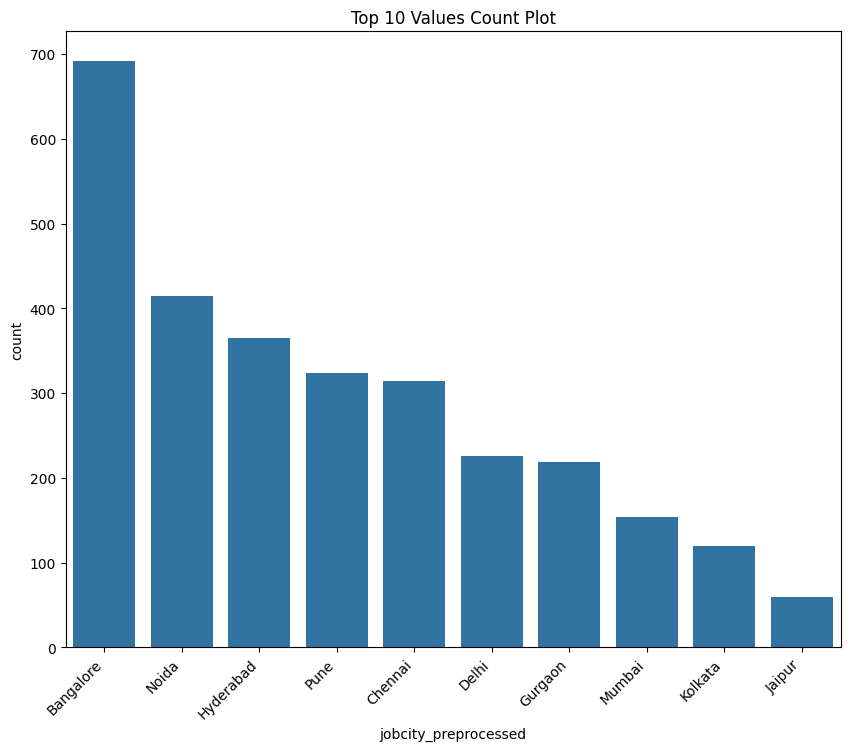

In [32]:
for col in ["designation_preprocessed","jobcity_preprocessed"]:
    print("*"*70,f"Column: {col}", "*"*70)
    non_viz_cat(df[col])
    viz_cat(col)
    print("\n")

Observation:
1. Designation -> Most of the people are **Software Engineer**
2. JobCity -> Most of the people are doing job in **Banglore**

# Bivariate Analysis

1. JobCity vs Salary (categorical vs numerical)

In [33]:
# selecting the cities having count > 15
city_counts = df['jobcity_preprocessed'].value_counts()
valid_cities = city_counts[city_counts >= 10].index
valid_cities
temp_df = df.loc[df['jobcity_preprocessed'].isin(valid_cities)]
grouped_data = temp_df.groupby('jobcity_preprocessed')
grouped_data["Salary"].agg(["min", "max","mean", "median"])

,min,max,mean,median
jobcity_preprocessed,,,,
Ahmedabad,80000,715000,275833.333333,225000.0
Bangalore,40000,2020000,352463.872832,325000.0
Bhopal,95000,1210000,239473.684211,170000.0
Bhubaneswar,60000,680000,257125.000000,287500.0
Chandigarh,100000,810000,319464.285714,325000.0
Chennai,50000,700000,290796.178344,300000.0
Coimbatore,100000,500000,279500.000000,302500.0
Delhi,70000,4000000,268761.061947,215000.0
Faridabad,95000,530000,203055.555556,190000.0


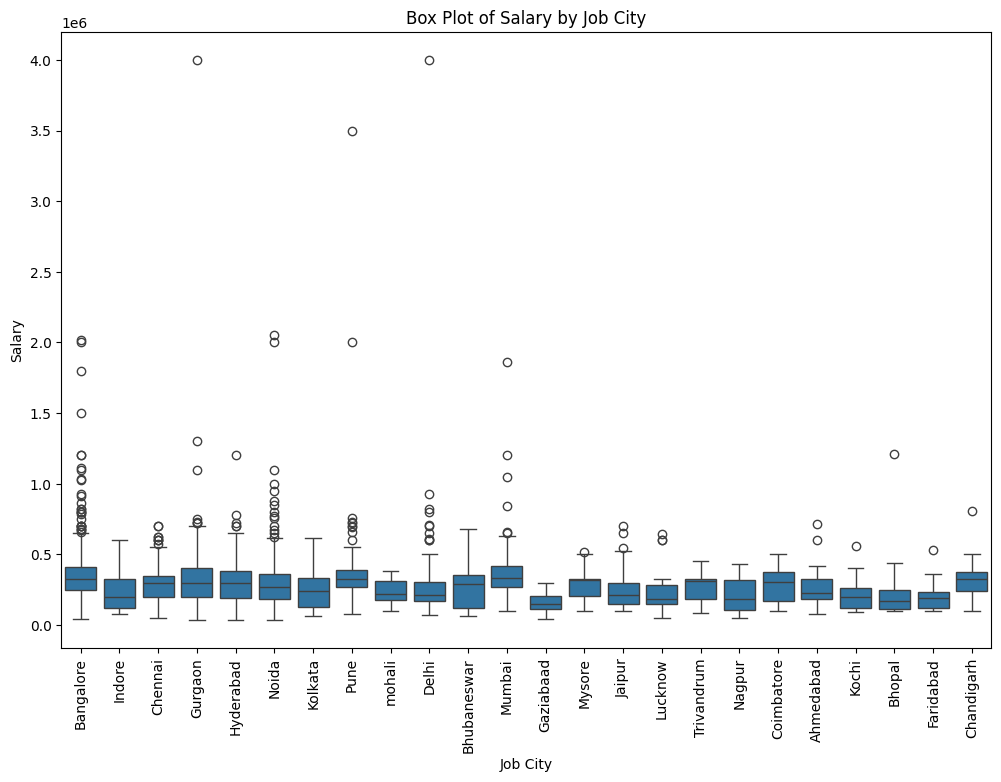

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='jobcity_preprocessed', y='Salary', data=temp_df)
plt.xticks(rotation=90)
plt.xlabel('Job City')
plt.ylabel('Salary')
plt.title('Box Plot of Salary by Job City')
plt.show()

# Observation:
According to the above box plot it is seen that there is an extreme outliers in the city **Gurgaon, Pune, Delhi**. Hence some employes of these cities were earning more compared other and average earning in every city is almost same.

# 2. Gender vs designation_preprocessed (categorical vs categorical)

In [35]:
tab = pd.crosstab(df["designation_preprocessed"], df["Gender"], normalize=True, margins=True)
tab_sorted = tab.sort_values(by='All', ascending=False)
tab_sorted

Gender,f,m,All
designation_preprocessed,,,
All,0.239768,0.760232,1.000000
software engineer,0.050783,0.167509,0.218292
jr. software developer,0.030571,0.092976,0.123547
assistant system engineer,0.019707,0.090197,0.109904
system engineer,0.019707,0.064174,0.083881
...,...,...,...
python developer,0.000000,0.000253,0.000253
editor,0.000253,0.000000,0.000253
project management officer,0.000000,0.000253,0.000253


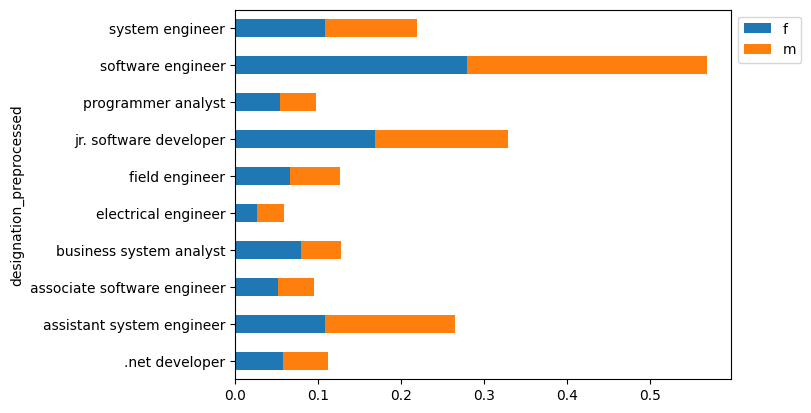

In [36]:
# Filtering the top 10 data to view the plots clearly
top_values = df["designation_preprocessed"].value_counts().head(10).index

filtered_df = df[df["designation_preprocessed"].isin(top_values)]

tab = pd.crosstab(filtered_df["designation_preprocessed"], filtered_df["Gender"], normalize='columns')
tab.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1,1))

# Observatioin
Above stacked bar plot shows that **Software Engineer** is the preferred job for both male and female employees.

## 3. Salary vs collegeGpa (Numerical vs Numerical)

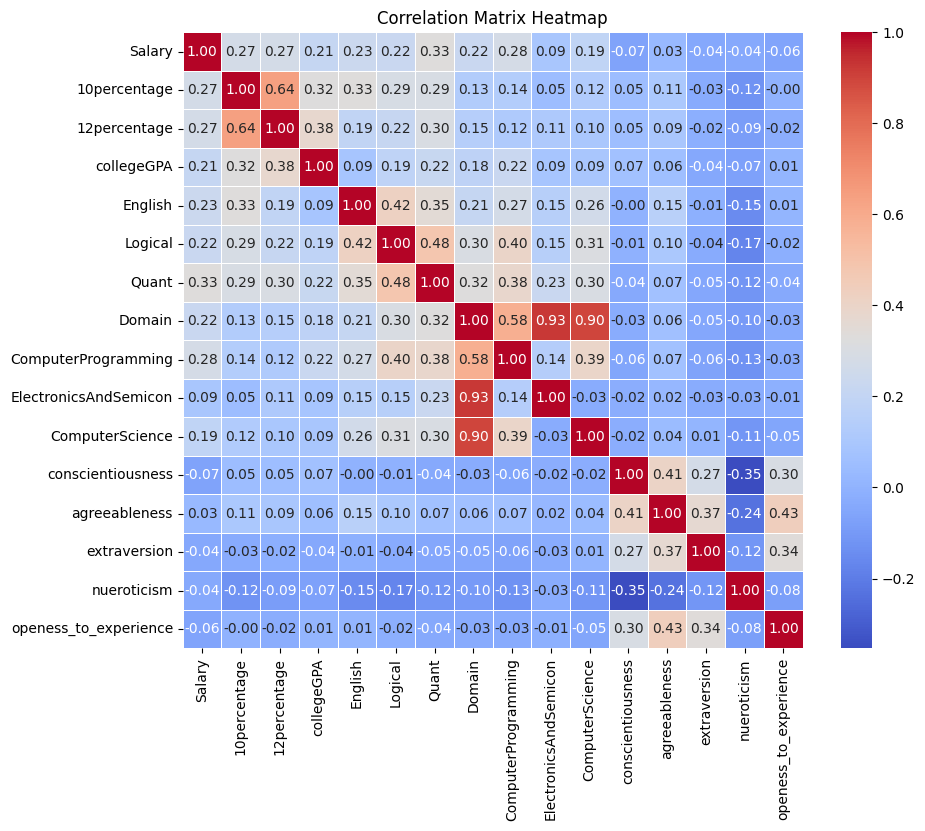

In [37]:
# non visualization with no outliers
correlation_matrix = df_num_no_outliers.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

plt.show()

## observation
**ElectronicsAndSemicon and ComputerScience** has high stromg positive correlations with almost similar.
So one of the column should be dropped or both should be combined to prevent  issue in model like LR as it may make model difficult to distinguish between those features

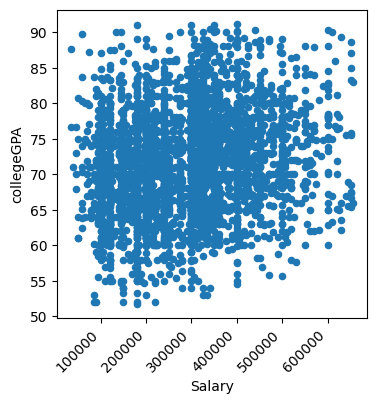

In [38]:
df_num_no_outliers.plot(kind="scatter", x="Salary", y="collegeGPA", figsize=(4,4))
plt.xticks(rotation=45, ha='right')
plt.show()

## Observation
THere is no correlation between Salary and collegeGPA with no outliers

## Research Questions
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


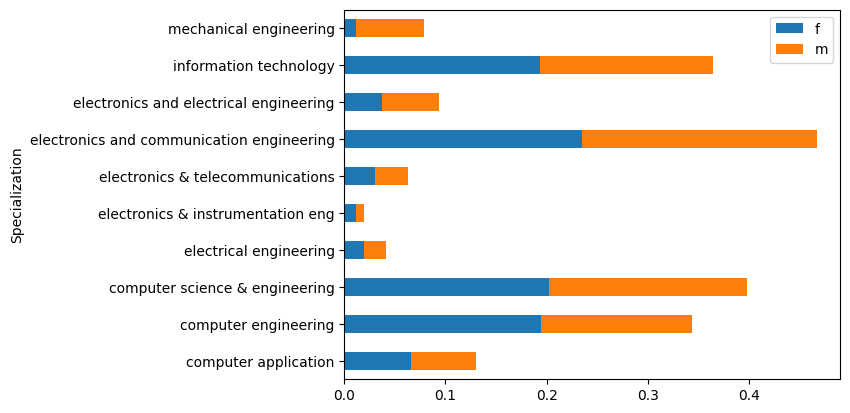

In [39]:
top_values = df["Specialization"].value_counts().head(10).index

filtered_df = df[df["Specialization"].isin(top_values)]

tab = pd.crosstab(filtered_df["Specialization"], filtered_df["Gender"], normalize='columns')
tab.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1,1))

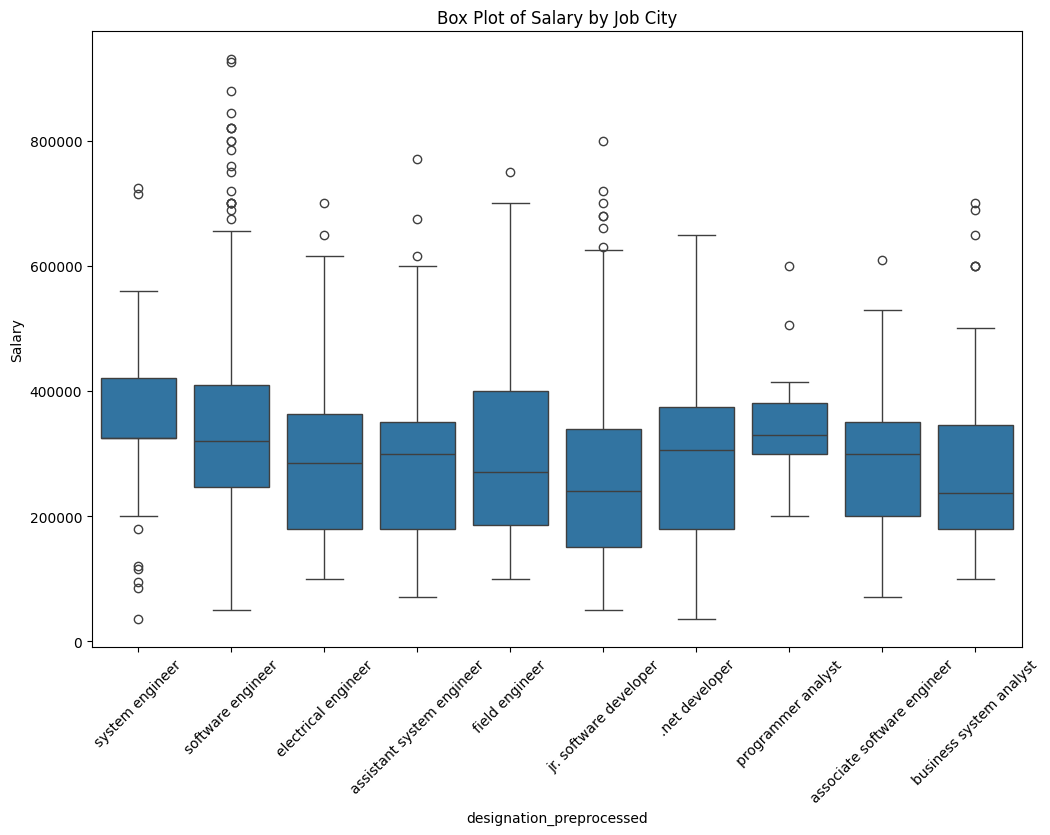

In [46]:
top_values = df["designation_preprocessed"].value_counts().head(10).index

filtered_df = df[df["designation_preprocessed"].isin(top_values)]


filtered_df["GraduationYear"] = pd.to_datetime(filtered_df["GraduationYear"], format='%Y')

temp_df["gap"] = (filtered_df["DOJ"] - filtered_df["GraduationYear"]).dt.days / 365.25
temp_df = temp_df[temp_df["gap"] <1 ] # filtering the fresh graduate only

temp_df = temp_df[temp_df["Salary"]<1000000]
plt.figure(figsize=(12, 8))
sns.boxplot(x='designation_preprocessed', y='Salary', data=temp_df)
plt.xticks(rotation=45)
plt.xlabel('designation_preprocessed')
plt.ylabel('Salary')
plt.title('Box Plot of Salary by Job City')
plt.show()

## Observation


1.   Fresh graduates with **Software Engineer** were earmimg more than 3 lakhs
2.   Female prefers **Computer Science Engineering** more than male


